Xinyang Gao

ECO225 Big Data Tool for Economist

Prof. Khazra

3.22.2023

# Are global warming trends occurring globally or only in certain areas?

# 1. Project One

## 1.1 Introduction
  How have the average temperatures changes varied over time across different areas and the entire surface of the Earth, including land and ocean? Does the Earth experience warming trends in only certain cities or countries or across the entire surface? How factors cause and affected by global warming?

  In this project we will discuss and take a look with temperature data from Berkeley Earth, CO2 emissions, greenhouse gas emissions, forest and biodiversity data from world Bank, and energy consummption from ourworldindata, and agricultre data form kaggle. These data records of the entire surface of the Earth, spanning all countries. By analyzing these records, we can observe the changes in global and local temperatures over time and potential factor related and affected by it. This will give us a better understanding of how average temperature is changing globally and locally and their impact to different areas.

  In first project we will focus on how the average temperatures, standard deviations, temperature changes, and maximum temperature changes have varied over time across different cities and the entire surface of the Earth, including land and ocean, we will be using the Y variables of average temperature, maximum temperature, standard deviation of temperature, and temperature. These variables will be analyzed against the X variables of location and years. Specifically, we will focus on the global land plus ocean and six cities, including Faisalabad, Shanghai, Lahore, Nanjing, Alexandria, and Chengdu. These locations were selected because they represent diverse geographic areas and have significant populations, making them highly relevant for examining local and global climate trends. Also these six cities have same latitude. By examining these factors in relation to location and time, we can better understand how climate is changing on a global scale, and whether the warming trends are occurring in certain cities.
  
  In the second project, we will analyze the y variables of temperature changes and potential factors like carbon emissions, energy generation, and fossil fuel consumption across the subgroup of X variables like different countries on different continents. This will help us understand how regions contribute to global climate change and identify potential strategies to address it. We will also investigate temperature changes and potential factors on a regional scale to identify the drivers of climate change and take steps towards mitigating its impacts.
  
  In our third project, we further explored the impact of climate change on various aspects of the environment, including forest area, threatened species, greenhouse gas emissions, and agricultural productivity. We used data from the World Bank, Our World in Data, and other sources to examine the trends and changes in these factors over time across different continents.
  
  After analyzing those data across three projects, it has been found that the average temperature has increased by 1-2 degrees Celsius during the last two centuries. This indicates a global warming trend, which is a major concern for mitigating the effects of climate change. Based on the data, it is evident that almost every country across the globe is experiencing higher average temperatures than they did 1.5 centuries ago. Also fossil fuel, carbon emission are correlated with the temperature change. The impact of global warming and climate change is not limited to temperature changes alone. It also affects other aspects of the environment, such as biodiversity, forest, and agriculture. These leading to a significant decline in biodiversity. This underscores the reality of global climate change and the urgent need for action to address its impacts.
  

## 1.2 Data loading and cleaning
In our research project on climate change, we needed to obtain data on average temperature, maximum temperature, standard deviation of temperature, and temperature over time for land, land plus ocean, and six cities: Faisalabad, Shanghai, Lahore, Nanjing, Alexandria, and Chengdu.

### Major Cities Temperature Data
We will first read the major city temperature data. It records the average temperature over month, city name, country, latitude, longitude, and average temperature uncertainty. Then we read global temperature data, and it records the land, land and ocean average temperature, average temperature uncertainty, maximum temperature over time.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
#Read data
file_path = "/Users/nick0o0o0/Library/Mobile Documents/com~apple~CloudDocs/gxyfile/third_year/ECO225/archive/"

country_temp = pd.read_csv(file_path + "GlobalLandTemperaturesByCountry.csv")
major_city_temp = pd.read_csv(file_path + "GlobalLandTemperaturesByMajorCity.csv")

global_temp = pd.read_csv(file_path + "GlobalTemperatures.csv")

### New Columns: Year, Month, NumLatitude, and Hemisphere for major city data
Now we will do data cleaning to create number version of Latitude in column NumLatitude and one string indicate which hemisphere it is in Hemisphere. With these column we will easy to find cities has similar latitude and esay to campare their data. We compare these data since they should have similar temperature as they has similar latitude. Also we will create new column called Year and Month to track the year and month seperatly. These two column are number so it is easy for us to slicing later on.

In [5]:
for row in major_city_temp.iterrows():
    index_value, column_value = row
    
    lati = column_value["Latitude"]
    time = column_value["dt"]

    if "N" in lati:
        major_city_temp.at[index_value, "Hemisphere"] = "N"
        major_city_temp.at[index_value, "NumLatitude"] = float(lati.replace("N",""))
        
    else:
        major_city_temp.at[index_value, "Hemisphere"] = "S"
        major_city_temp.at[index_value, "NumLatitude"] = float(lati.replace("S",""))
    
    major_city_temp.at[index_value, "Year"] = int(time[0:4])
    major_city_temp.at[index_value, "Month"] = int(time[5:7])


### Change datatype to int for Year, Month, and RoundLati
Next we create a column called RoundLati which is the rounded latitude for that city since it may difficult to find several cities has the same and precise latitude in this data. We use rounded function to have a integer for the Latitude. Change the datatype for Year, Month, and RoundLati to integer.

In [6]:
major_city_temp["RoundLati"] = round(major_city_temp["NumLatitude"])
major_city_temp["Year"] = major_city_temp["Year"].astype(int)
major_city_temp["Month"] = major_city_temp["Month"].astype(int)
major_city_temp["RoundLati"] = major_city_temp["RoundLati"].astype(int)


### Groupby city and year
Working on data over month may have too much data, so we want to get a aggregation with year. Next we use groupby method to get the average, standard deviation, maximum, and difference of temperature over each year of each city in major city data. This is useful when we want to compare data over year.

Below is the average temperature of each city of each year

In [7]:
major_copy = major_city_temp.copy()
MajorCity_year_average = major_copy.groupby(["City", "Year"]).mean()
MajorCity_year_average.rename(columns={"AverageTemperature": "YearAverageTemperature"}, inplace=True)


Below is the average temperature standanr deviation of each city of each year.

In [8]:
MajorCity_year_std = major_copy.groupby(["City", "Year"]).std()
MajorCity_year_std.rename(columns={"AverageTemperature": "YearAverageTemperatureStd"}, inplace=True)


Below is the maxmum temperature of each city of each year

In [9]:
MajorCity_year_Max = major_copy.groupby(["City", "Year"]).max()
MajorCity_year_Max.rename(columns={"AverageTemperature": "YearAverageTemperatureMax"}, inplace=True)


Below is the average temperature difference of each city of each year

In [10]:
Major3Col = major_copy[["City", "Year", "AverageTemperature"]]

Major3Col["AverageTemperature"].astype(float)

MajorCity_year_Dif = Major3Col.groupby(["City", "Year"]).max() - Major3Col.groupby(["City", "Year"]).min()
MajorCity_year_Dif.rename(columns={"AverageTemperature": "YearAverageTemperatureDifference"}, inplace=True)


### Cities with similar Latitude with Shanghai
Shanghai is my hometown, so I choose it and get a list of City with same latitude with it. Now the NumLatitude and Hemisphere are useful. First let's find the latitude of Shanghai. Then use locate a list of cities in the data tha has the similar latitude with Shanghai.

In [11]:
Shanghai_lati = major_city_temp.set_index("City").loc["Shanghai",["RoundLati", "Hemisphere"]]

In [12]:
SameLati_Shanghai = major_city_temp.set_index(["RoundLati", "Hemisphere"]).loc[31, "N"]["City"]

These will be useful for slicing for a pivot table later on. Since graph all cities temperature is hard to see the trend. We pick these cities because they have the same latitude.

In [13]:
SameLati_Shanghai = list(set(SameLati_Shanghai))

### Pivot Table of average, standard deviation,  maximum, and difference of temperature for major cities over year
We use cleaned data in 2.1.5 to track and create pivot table for average, standard deviation, max, and difference of temperature with city name as the columns and year as the index. These help us to only focus on city, year, and temperature.

#### Pivot Table of average temperature of major cities over years

In [14]:
NoIndex_majorAvg = MajorCity_year_average.reset_index()
YearTempPivotTable = NoIndex_majorAvg.pivot_table(values="YearAverageTemperature", index="Year", columns="City")

#### Pivot Table of standard deviation of temperature of major cities over years

In [15]:
NoIndex_majorAvg = MajorCity_year_std.reset_index()
YearTempStdPivotTable = NoIndex_majorAvg.pivot_table(values="YearAverageTemperatureStd", index="Year", columns="City")

#### Pivot Table of maximum of temperature of major cities over years

In [16]:
NoIndex_majorAvg = MajorCity_year_Max.reset_index()
YearTempMaxPivotTable = NoIndex_majorAvg.pivot_table(values="YearAverageTemperatureMax", index="Year", columns="City")

#### Pivot Table of temperature difference of major cities over years

In [17]:
NoIndex_majorAvg = MajorCity_year_Dif.reset_index()
YearTempDifPivotTable = NoIndex_majorAvg.pivot_table(values="YearAverageTemperatureDifference", index="Year", columns="City")

### Global temprature data
We will do data cleaning to global temperature too and create a new column called year to track which year of each row. We first do groupby year to get a average, standard deviationm, maximum temperature and temperature difference of land, ocean of earth over years.

In [18]:
for row in global_temp.iterrows():
    row_index, row_values = row
    global_temp.at[row_index, "Year"] = row_values["dt"][0:4]


#### Global average temperature group by years
Also create two columns called Land>=8.5 and LandOcean>=15.5 to indicate whether the average temperature of land is exceed 8.5 and average temperature of land and ocean exceed 15.5 that year. 

In [19]:
YearAverageGlobal = global_temp.groupby("Year").mean()
YearAverageGlobal.index = YearAverageGlobal.index.astype(int)

for row in YearAverageGlobal.iterrows():
    row_index, row_values = row
    LandAvg = row_values["LandAverageTemperature"]
    OceanLandAvg = row_values["LandAndOceanAverageTemperature"]
    
    if LandAvg >= 8.5:
        YearAverageGlobal.at[row_index, "Land>=8.5"] = 1
    else:
        YearAverageGlobal.at[row_index, "Land>=8.5"] = 0
        
    if OceanLandAvg >= 15.5:
        YearAverageGlobal.at[row_index, "LandOcean>=15.5"] = 1
    else:
        YearAverageGlobal.at[row_index, "LandOcean>=15.5"] = 0


#### Global average standard deviation temperature group by years

In [20]:
YearStdGlobal = global_temp.groupby("Year").std()
YearStdGlobal.index = YearStdGlobal.index.astype(int)

#### Global maximum temperature group by years
Also create two columns called Land>=20.5 and LandOcean>=17 to indicate whether the maximum temperature of land is exceed 20.5 and average temperature of land and ocean exceed 17 that year. 

In [21]:
YearMaxGlobal = global_temp.groupby("Year").max()
YearMaxGlobal.index = YearMaxGlobal.index.astype(int)

for row in YearMaxGlobal.iterrows():
    row_index, row_values = row
    LandAvg = row_values["LandMaxTemperature"]
    OceanLandAvg = row_values["LandAndOceanAverageTemperature"]
    
    if LandAvg >= 20.5:
        YearMaxGlobal.at[row_index, "Land>=20.5"] = 1
    else:
        YearMaxGlobal.at[row_index, "Land>=20.5"] = 0
        
    if OceanLandAvg >= 17:
        YearMaxGlobal.at[row_index, "LandOcean>=17"] = 1
    else:
        YearMaxGlobal.at[row_index, "LandOcean>=17"] = 0


#### Global difference temperature group by years

In [22]:
global_temp_copy = global_temp.drop(global_temp.columns[0], axis=1)
global_list = global_temp_copy.columns.to_list()
for col in global_list:
    global_temp_copy[col].astype(float)
    
YearDifGlobal = global_temp_copy.groupby("Year").max() - global_temp_copy.groupby("Year").min()
YearDifGlobal.index = YearDifGlobal.index.astype(int)

## 1.3 Summary Statistics Tables
Let's now summarize what we have accomplished and highlight which data is important. We have created four types of pivot tables for major cities and global temperature. These tables display the average, maximum, standard deviation, and difference of temperature changes over the years for Faisalabad, Shanghai, Lahore, Nanjing, Alexandria, and Chengdu or the global land and ocean. The average and maximum temperatures are useful and convenient for plotting. In the next section, we can analyze the temperature trend over the years by graphing these variables. The standard deviation of temperature and temperature difference changes over the years provide insights into the stability of the global or local temperature. If the standard deviation increases, it means the temperature for 12 months is becoming more dispersed, indicating that the weather in the same area is becoming more extreme. If the temperature difference increases, it means the difference between the lowest and highest monthly temperature is becoming greater. These variables can be used to study both the global and specific city temperatures.

Below is a summary of the data cleaning process that we have carried out.

### Data for selected cities

#### Pivot Table of average temperature of Faisalabad, Shanghai, Lahore, Nanjing, Alexandria, and Chengdu
Each cell in the dataset represents the average temperature of the corresponding city and year. The dataset is missing data for the year 2013. By analyzing the data, we can observe that Shanghai, Nanjing, Alexandria, and Chengdu have all experienced an increase in average temperature by 1-2 degrees Celsius when comparing the data from 1841 and 2012. These findings are consistent with global temperature trends, which have also shown an increase in average temperature over the last two centuries.

In [23]:
df = YearTempPivotTable[SameLati_Shanghai].dropna().copy()
df = pd.concat([df.head(3), df.tail(3)])
df

City  Faisalabad  Alexandria     Lahore    Chengdu   Shanghai    Nanjing
Year                                                                    
1841   24.031300   20.084750  24.031300   9.833083  14.869583  14.495167
1842   25.042111   19.919250  25.042111  10.235167  15.427667  15.060500
1843   23.713667   19.906000  23.713667  10.327000  15.528833  15.159917
2011   24.975250   21.181500  24.975250  11.074333  16.518000  16.218917
2012   24.869417   21.552583  24.869417  11.159750  16.474500  16.131000
2013   25.952625   21.438500  25.952625  13.347000  17.857625  17.884125

#### Pivot Table of max temperature of Faisalabad, Shanghai, Lahore, Nanjing, Alexandria, and Chengdu
Each cell in the dataset corresponds to the maximum temperature recorded in the corresponding city and year. Upon analyzing the data, we observe that all cities, namely Faisalabad, Shanghai, Lahore, Nanjing, Alexandria, and Chengdu, have experienced an increase of 1-2 degrees Celsius in the average maximum temperature during the hottest month of the year, when comparing the years 1841 and 2012. This upward trend in maximum temperature over time is statistically significant and indicates a pattern of global warming.

In [24]:
df = YearTempMaxPivotTable[SameLati_Shanghai].dropna().copy()
df = pd.concat([df.head(3), df.tail(3)])
df

City  Faisalabad  Alexandria  Lahore  Chengdu  Shanghai  Nanjing
Year                                                            
1841      33.106      27.251  33.106   19.818    27.783   27.611
1842      31.870      25.545  31.870   18.574    27.013   26.575
1843      33.110      25.976  33.110   19.270    27.372   27.076
2011      34.134      27.637  34.134   20.359    29.253   28.622
2012      35.649      28.613  35.649   20.640    29.441   29.488
2013      34.456      27.453  34.456   21.264    30.623   30.459

#### Pivot Table of temperature difference of Faisalabad, Shanghai, Lahore, Nanjing, Alexandria, and Chengdu
Every cell in the dataset corresponds to the average temperature difference of the corresponding city and year. Statistical analysis shows that Faisalabad, Shanghai, Lahore, and Nanjing have experienced an increase in temperature difference of about 1 degree Celsius when comparing 1841 and 2012. In contrast, Alexandria has experienced a decrease in temperature difference of about 1 degree Celsius during the same period. These findings indicate that the magnitude and direction of temperature changes can vary across different regions, and it is important to consider both local and global trends when examining the effects of climate change. 

In [25]:
df = YearTempDifPivotTable[SameLati_Shanghai].dropna().copy()
df = pd.concat([df.head(3), df.tail(3)])
df

City  Faisalabad  Alexandria  Lahore  Chengdu  Shanghai  Nanjing
Year                                                            
1841      21.935      13.530  21.935   20.554    25.974   26.474
1842      17.766      12.641  17.766   18.488    23.985   24.236
1843      20.716      11.393  20.716   18.529    23.548   23.962
2011      22.727      12.000  22.727   21.806    28.553   28.478
2012      23.636      15.153  23.636   20.474    25.566   26.320
2013      22.237      12.414  22.237   20.650    26.946   27.441

#### Pivot Table of standard deviation temperature of Faisalabad, Shanghai, Lahore, Nanjing, Alexandria, and Chengdu
Every cell correpsond the standard deviation of temperature of corresponging city and corresponging year.It is important to note that while none of these cities showed a significant change in temperature variation between 1841 and 2012, this could still have important implications for climate change research. Specifically, changes in the standard deviation of temperature could indicate changes in weather patterns or increased frequency of extreme temperature events, both of which can have significant impacts on local ecosystems and human health. Therefore, even if the changes in standard deviation are not statistically significant, they should still be carefully monitored and analyzed for potential long-term effects.

In [26]:
df = YearTempStdPivotTable[SameLati_Shanghai].dropna().copy()
df = pd.concat([df.head(3), df.tail(3)])
df

City  Faisalabad  Alexandria    Lahore   Chengdu   Shanghai    Nanjing
Year                                                                  
1841    8.491180    5.003125  8.491180  7.307309   9.174271   9.353196
1842    6.291019    4.519192  6.291019  6.633742   8.503102   8.701414
1843    7.690557    4.224156  7.690557  6.652217   8.422991   8.612064
2011    7.898164    4.715810  7.898164  7.335649   9.438262   9.490297
2012    8.420840    5.491338  8.420840  7.193872   9.416179   9.711420
2013    8.838606    4.845030  8.838606  7.596997  10.520148  10.677467

### Data for surface of the Earth

#### Pivot Table of average temperature of Global over years
Each cell in the dataset corresponds to the average temperature of the corresponding column over a given year. We have created two new binary columns, Land>=8.5 and LandOcean>=17, which indicate whether the average temperature of land is greater than or equal to 8.5 and whether the average temperature of land and ocean combined is greater than or equal to 17 for each year, respectively. Our analysis shows that both the LandAverageTemperature and LandAndOceanAverageTemperature have increased by approximately 2 degrees Celsius between 1850 and 2015. This increase is indicates a global warming trend. The binary columns also reveal that the frequency of years with average temperatures above these thresholds has increased over time, suggesting that the warming trend is becoming more severe.

In [27]:
df = YearAverageGlobal[["LandAverageTemperature", "LandAndOceanAverageTemperature","Land>=8.5", "LandOcean>=15.5"]].dropna().copy()
df = pd.concat([df.head(3), df.tail(3)])
df

LandAverageTemperature  LandAndOceanAverageTemperature  Land>=8.5  \
Year                                                                      
1850                7.900667                       14.867167        0.0   
1851                8.178583                       14.991833        0.0   
1852                8.100167                       15.006500        0.0   
2013                9.606500                       15.854417        1.0   
2014                9.570667                       15.913000        1.0   
2015                9.831000                       16.058583        1.0   

      LandOcean>=15.5  
Year                   
1850              0.0  
1851              0.0  
1852              0.0  
2013              1.0  
2014              1.0  
2015              1.0

#### Pivot Table of maximum temperature of Global over years
Each cell in the dataset represents the maximum of month average temperature of the corresponding column over the years. The analysis shows that both the maximum temperature of land and land plus ocean has increased by 1 degree Celsius when comparing the temperatures from 1850 to 2015. This increase in temperature is significant and highlights the trend of global warming over the past century. These findings reinforce the evidence of globale warming.

In [28]:
df = YearMaxGlobal[["LandAverageTemperature", "LandAndOceanAverageTemperature"]].dropna().copy()
df = pd.concat([df.head(3), df.tail(3)])
df

LandAverageTemperature  LandAndOceanAverageTemperature
Year                                                        
1850                  14.492                          16.783
1851                  14.531                          16.831
1852                  14.512                          16.984
2013                  15.003                          17.503
2014                  14.875                          17.607
2015                  15.051                          17.611

#### Pivot Table of temperature difference of Global over years
The temperature difference between the coldest and hottest month is an important indicator of the temperature variability throughout the year. The data shows that the land temperature difference has decreased by 2 degrees Celsius between 1850 and 2015. This indicates a more stable temperature range throughout the year. The decrease in temperature difference for the land plus ocean column is less pronounced but still shows a slight decrease. This could be an indication of a shift towards a more stable climate in recent years. However, it's important to note that these changes are still within the natural variability of the climate and may not necessarily indicate a long-term trend. Further analysis is needed to determine the significance of these changes.

In [29]:
df = YearDifGlobal[["LandAverageTemperature", "LandAndOceanAverageTemperature"]].dropna().copy()
df = pd.concat([df.head(3), df.tail(3)])
df

LandAverageTemperature  LandAndOceanAverageTemperature
Year                                                        
1850                  13.743                           3.950
1851                  12.100                           3.586
1852                  12.136                           3.753
2013                  11.318                           3.386
2014                  11.375                           3.471
2015                  11.170                           3.356

#### Pivot Table of standard deviation temperature of Global over years
The standard deviation of temperature measures the variability of temperature within each column over time. In this dataset, we observe that the standard deviation of temperature for both land and land plus ocean did not change significantly between 1850 and 2015. This means that the spread of temperature values around the mean remained relatively stable over time, suggesting that there was no significant shift in the overall variability of temperature on land or land plus ocean globally. However, it is important to note that local regions may have experienced different levels of variability, and further analysis could be conducted to explore these regional differences in more detail.

In [30]:
df = YearStdGlobal[["LandAverageTemperature", "LandAndOceanAverageTemperature"]].dropna().copy()
df = pd.concat([df.head(3), df.tail(3)])
df

LandAverageTemperature  LandAndOceanAverageTemperature
Year                                                        
1850                4.726851                        1.369906
1851                4.652832                        1.339856
1852                4.553437                        1.386375
2013                4.306305                        1.274133
2014                4.396015                        1.331519
2015                4.120330                        1.229084

### Summary
In conclusion, the analysis of the temperature dataset reveals consistent evidence of global warming over the past century. The increase in average and maximum temperatures, as well as the decrease in temperature difference, suggests a shift towards a more stable climate. However, the standard deviation of temperature remained relatively stable, indicating that the spread of temperature values around the mean did not change significantly. The findings also highlight the importance of considering both global and local trends when examining the effects of climate change. Further analysis is needed to determine the significance of these changes and their potential long-term impacts.

## 1.4 Plots and Figures


### Climate change of six cities with the same latitude
This subsecton is temperature trend in Alexandria, Chengdu, Lahore, Faisalabad, Shanghai, and Nanjing. These cities has almost same latitude in the earth. 

#### Average temperature changes over year
The graph illustrates the trend of average temperature in six cities: Alexandria, Chengdu, Lahore, Faisalabad, Shanghai, and Nanjing over the past two centuries. Each dot on the graph represents the average temperature of a given year in the respective city.

From the graph, it is evident that the average temperature of all six cities has risen by 1-2°C over the last two centuries, with a noticeable upward trend. This suggests a gradual warming of the climate in these regions over time. However, it is important to note that the data for the year 2013 is incomplete and should be disregarded.

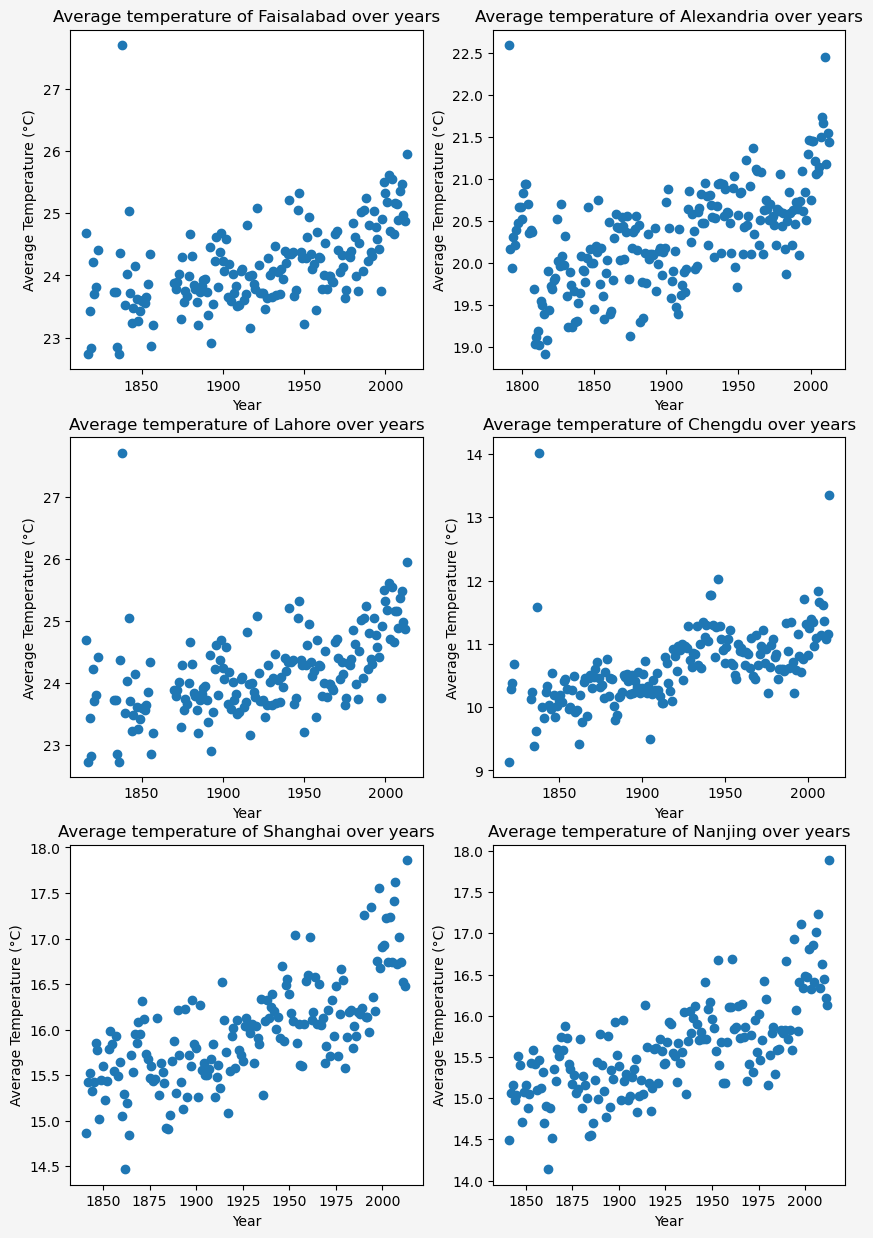

In [31]:
fig, ax = plt.subplots(3, 2, figsize=(10, 15))
SameLatiArray = np.array(SameLati_Shanghai).reshape(3, 2)
fig.set_facecolor((0.96, 0.96, 0.96))

for i in range(3):
    for j in range(2):
        
        ax[i, j].scatter(x=YearTempPivotTable.index, y=YearTempPivotTable[SameLatiArray[i, j]], )
        ax[i, j].set_title("Average temperature of "+ SameLatiArray[i, j] +" over years")
        ax[i, j].set_xlabel("Year")
        ax[i, j].set_ylabel("Average Temperature (°C)")

#### Maximum temperature changes over year
The graph presents the trend of maximum temperature in the previously mentioned cities, with each dot representing the maximum temperature recorded over twelve months in a given year. The cities considered are Lahore, Faisalabad, Shanghai, Nanjing, Chengdu, and Alexandria.

The data reveals that Lahore and Faisalabad have experienced an upward trend in their maximum temperature, with an increase of 1-2°C over the past two centuries. This trend is consistent with the overall trend of climate change observed globally. In contrast, the maximum temperature in Shanghai and Nanjing varies significantly, making it challenging to determine a clear trend. Chengdu shows a slight upward trend in its maximum temperature over time.

Furthermore, the data shows that Alexandria experienced a sharp increase of 2°C in its maximum temperature between 1975 and 2020. This trend is alarming, and it indicates the increasing severity of climate change and its consequences on local and global scales.

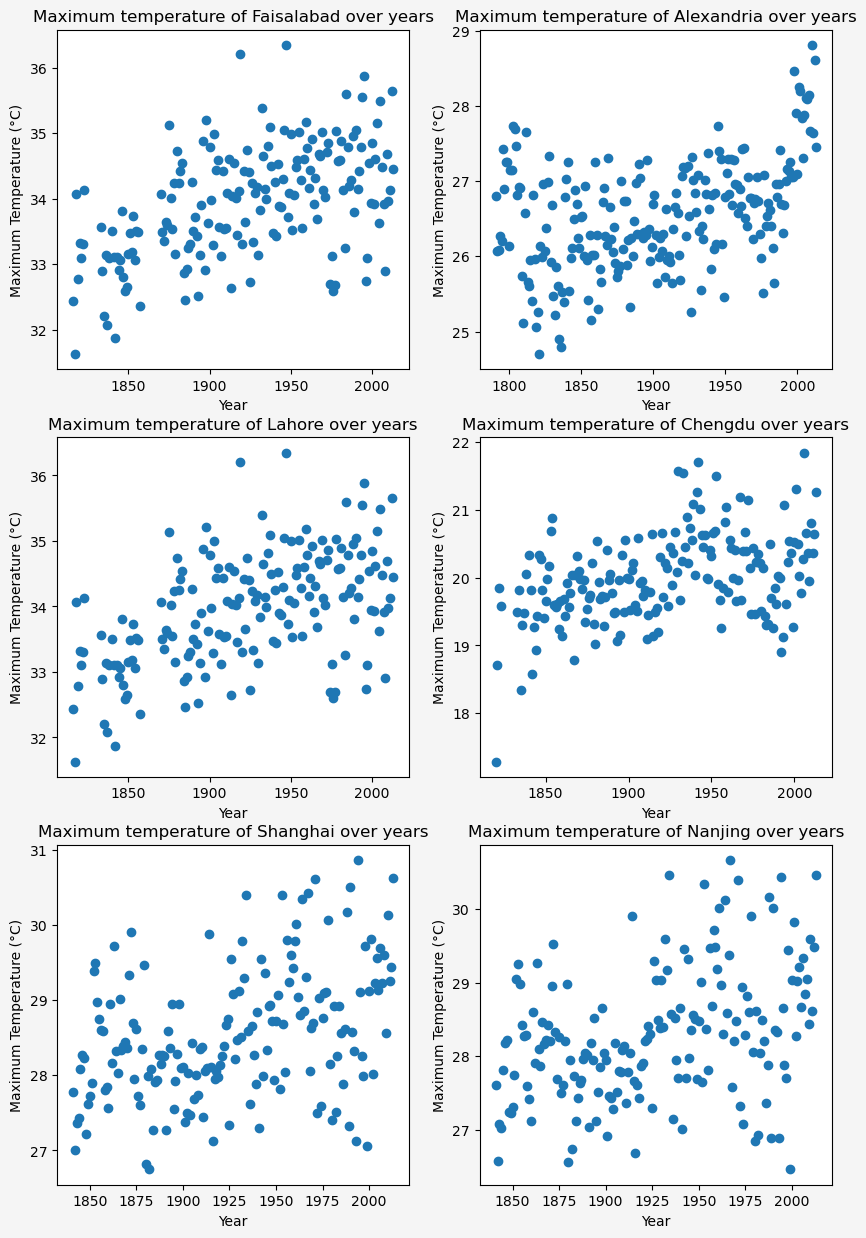

In [32]:
datapicked = YearTempMaxPivotTable
fig, ax = plt.subplots(3, 2, figsize=(10, 15))
SameLatiArray = np.array(SameLati_Shanghai).reshape(3, 2)
fig.set_facecolor((0.96, 0.96, 0.96))

for i in range(3):
    for j in range(2):
        
        ax[i, j].scatter(x=datapicked.index, y=datapicked[SameLatiArray[i, j]], )
        ax[i, j].set_title("Maximum temperature of "+ SameLatiArray[i, j] +" over years")
        ax[i, j].set_xlabel("Year")
        ax[i, j].set_ylabel("Maximum Temperature (°C)")

#### Standand deviation of temperature changes over year
The graph depicts the trend of temperature standard deviation in the cities mentioned earlier. Each dot on the graph represents the standard deviation of temperature recorded over twelve months in a given year. A higher standard deviation indicates greater variability in temperature over time.

The data shows that none of the cities exhibit a significant upward or downward trend in temperature standard deviation over time. Lahore and Faisalabad have a relatively stable standard deviation compared to the other cities. This stability implies that the climate in these cities has been relatively consistent over the years.

An increase in temperature standard deviation indicates greater variability in temperature, which could potentially result in more extreme weather events such as heatwaves, cold spells, and storms. However, the standard deviation of temperature in the considered cities appears to be relatively stable over time.

Overall, this graph suggests that while there is no significant trend in temperature standard deviation in these cities.

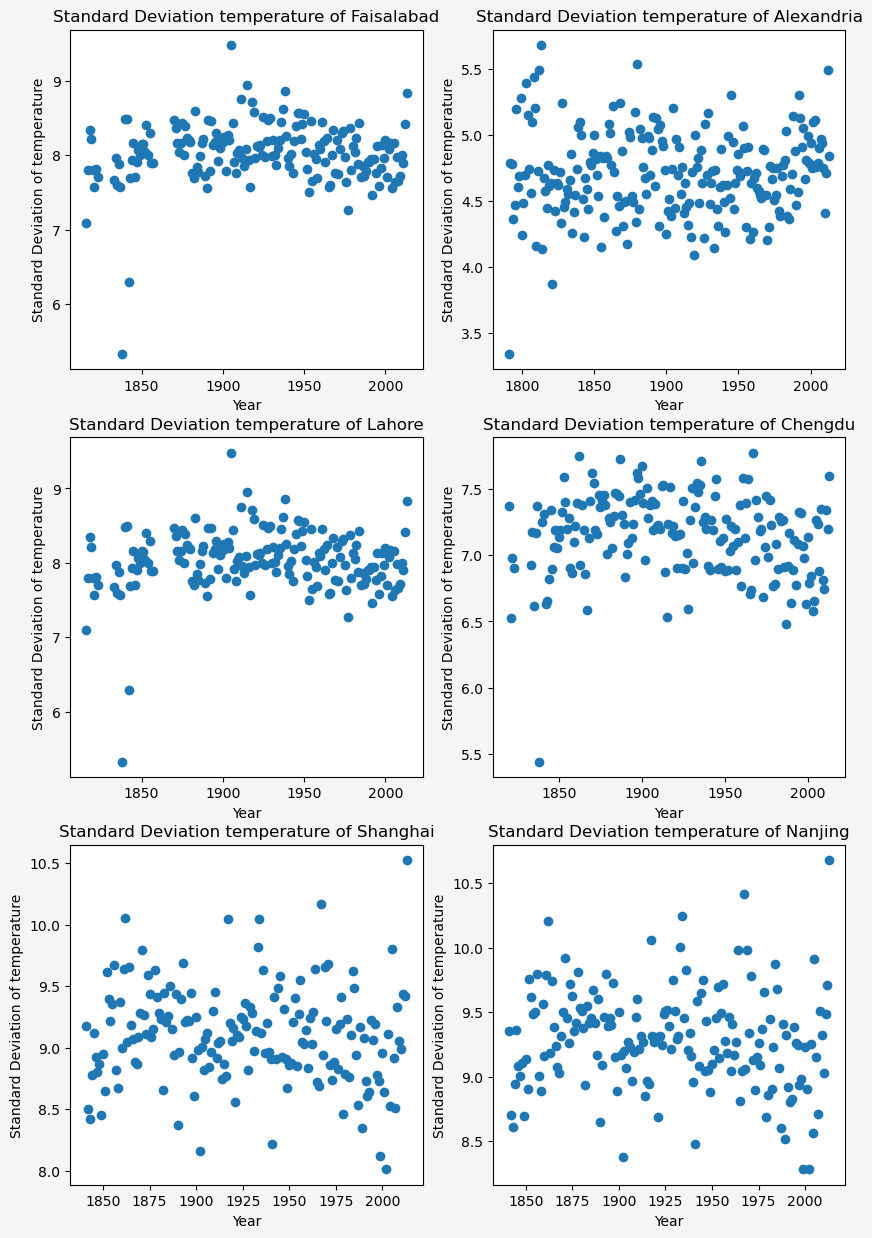

In [33]:
datapicked = YearTempStdPivotTable
fig, ax = plt.subplots(3, 2, figsize=(10, 15))
SameLatiArray = np.array(SameLati_Shanghai).reshape(3, 2)
fig.set_facecolor((0.96, 0.96, 0.96))

for i in range(3):
    for j in range(2):
        
        ax[i, j].scatter(x=datapicked.index, y=datapicked[SameLatiArray[i, j]], )
        ax[i, j].set_title("Standard Deviation temperature of "+ SameLatiArray[i, j])
        ax[i, j].set_xlabel("Year")
        ax[i, j].set_ylabel("Standard Deviation of temperature")

#### Temperature difference changes over year
The graph illustrates the trend of temperature difference in the cities mentioned earlier. Each dot represents the temperature difference calculated as the difference between the average temperature of the highest and lowest month in a given year.

The data indicates that, similar to temperature standard deviation, the temperature difference in these cities remains relatively stable over time. There is no significant upward or downward trend in temperature difference, suggesting that the climate in these cities has been relatively consistent over time.

A stable temperature difference indicates that the seasonal variation in temperature in these cities has remained consistent over time. This consistency could have significant implications for agriculture, as it provides some degree of predictability regarding crop growth and harvest cycles.

In conclusion, this graph highlights the importance of continuing to monitor and analyze climate data to understand the impact of climate change on our planet. While temperature difference in these cities remains relatively stable, other indicators such as rising temperatures and changes in precipitation patterns could still have significant consequences for the environment and society. 

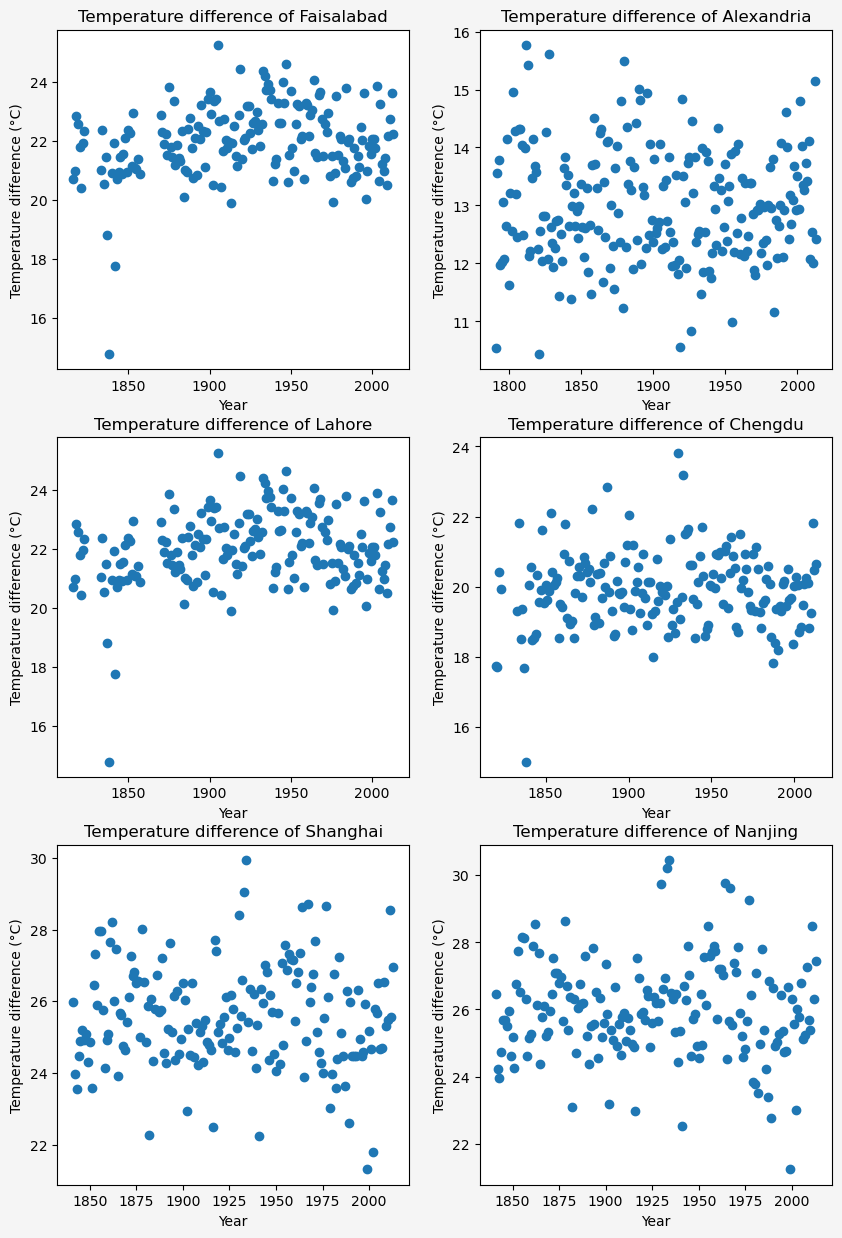

In [34]:
datapicked = YearTempDifPivotTable
fig, ax = plt.subplots(3, 2, figsize=(10, 15))
SameLatiArray = np.array(SameLati_Shanghai).reshape(3, 2)
fig.set_facecolor((0.96, 0.96, 0.96))

for i in range(3):
    for j in range(2):
        
        ax[i, j].scatter(x=datapicked.index, y=datapicked[SameLatiArray[i, j]], )
        ax[i, j].set_title("Temperature difference of "+ SameLatiArray[i, j])
        ax[i, j].set_xlabel("Year")
        ax[i, j].set_ylabel("Temperature difference (°C)")

### Global Climate change
In this subsection we will talk about temperature change globbally. It reflect climate changes of all land and all land plus ocean over year.

#### Average temperature change of land and land plus ocean
A clear and precise statement about global warming is crucial for understanding its impact on our planet. It is observed that the average temperature of both land and ocean has been consistently rising. Over the past 250 years, the average temperature of land has increased by nearly 2°C, while the average temperature of land and ocean combined has increased by approximately 1°C over the last 200 years. Furthermore, the pace of the increase appears to be accelerating.

Text(0.5, 1.0, 'Average temperature of ocean and land of earth over years')

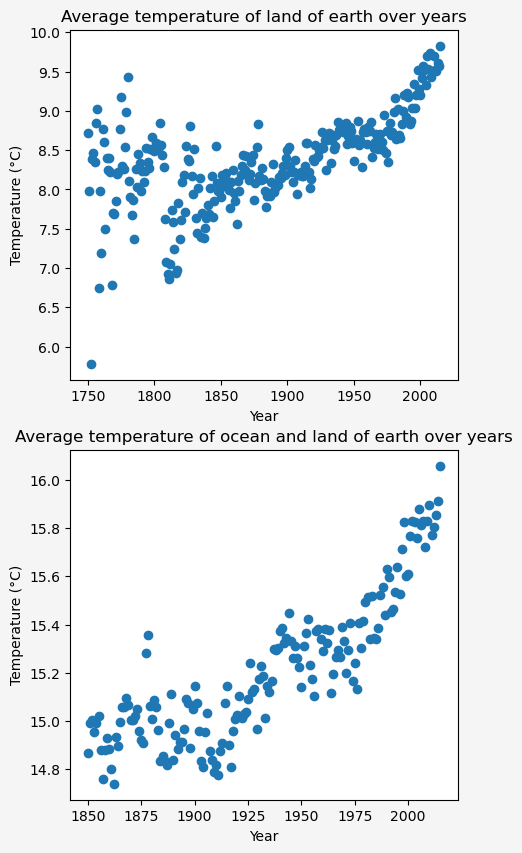

In [35]:
datapicked = YearAverageGlobal
column_picked = ["LandAverageTemperature", "LandAndOceanAverageTemperature"]
fig, ax = plt.subplots(2, 1, figsize=(5,10))

fig.set_facecolor((0.96, 0.96, 0.96))

for i in range(2):        
    ax[i].scatter(x=datapicked.index, y=datapicked[column_picked[i]])
    ax[i].set_xlabel("Year")
    ax[i].set_ylabel("Temperature (°C)")
    
ax[0].set_title("Average temperature of land of earth over years")
ax[1].set_title("Average temperature of ocean and land of earth over years")

#### Maximum temperature change of land and land plus ocean
The data clearly shows that global warming is impacting the maximum temperature of our planet, with both land and ocean experiencing an upward trend in temperature. Over the last three decades, the maximum temperature of land has increased by 1°C, indicating a rapid rate of change. Meanwhile, the maximum temperature of land plus ocean has increased by 1°C over the last two centuries, representing a more gradual but steady increase.

Text(0.5, 1.0, 'Maximum temperature of ocean and land of earth over years')

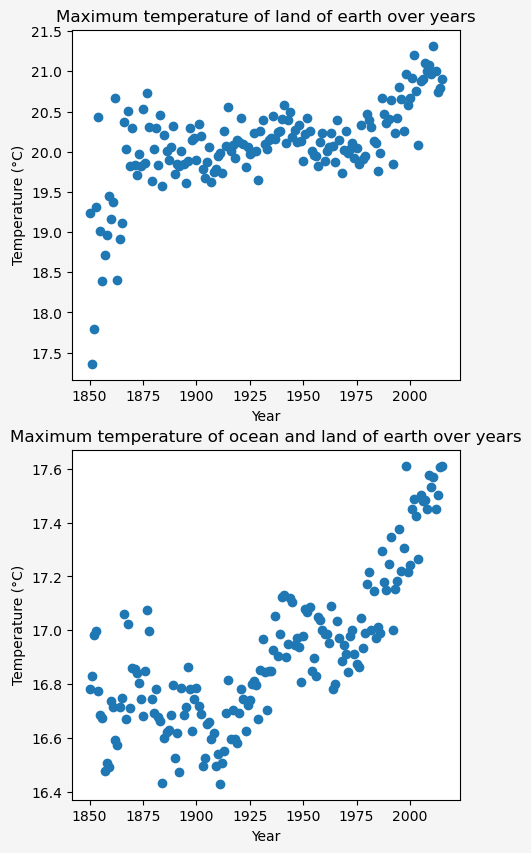

In [36]:
datapicked = YearMaxGlobal
column_picked = ["LandMaxTemperature", "LandAndOceanAverageTemperature"]
fig, ax = plt.subplots(2, 1, figsize=(5,10))

fig.set_facecolor((0.96, 0.96, 0.96))

for i in range(2):        
    ax[i].scatter(x=datapicked.index, y=datapicked[column_picked[i]])
    ax[i].set_xlabel("Year")
    ax[i].set_ylabel("Temperature (°C)")
    
ax[0].set_title("Maximum temperature of land of earth over years")
ax[1].set_title("Maximum temperature of ocean and land of earth over years")

#### Temperature difference change of land and land plus ocean
The temperature difference is a measure of the variation between the average temperatures of the hottest and coldest months in a given location. It is an important indicator of the overall climate conditions in a region. Both on land and in the ocean, the temperature difference has been experiencing a gradual decrease over the years. This implies that the coldest months are not as cold as they used to be in the past.

This trend can be attributed to several factors, including climate change and global warming. The rise in global temperatures has led to a decrease in temperature differences, as the warmer months are becoming even warmer while the colder months are becoming less cold. As a result, regions that once experienced distinct seasons with significant temperature differences are now experiencing milder, more uniform climates.

At the same time, the average global temperature has been on a steady rise, indicating a clear warming trend. 

Text(0.5, 1.0, 'Temperature difference of ocean and land of earth over years')

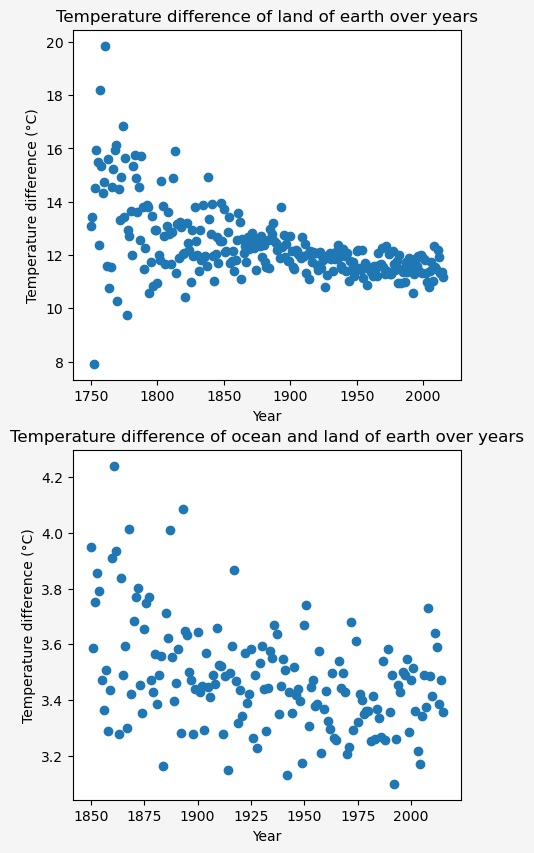

In [37]:
datapicked = YearDifGlobal
column_picked = ["LandAverageTemperature", "LandAndOceanAverageTemperature"]
fig, ax = plt.subplots(2, 1, figsize=(5, 10))

fig.set_facecolor((0.96, 0.96, 0.96))

for i in range(2):        
    ax[i].scatter(x=datapicked.index, y=datapicked[column_picked[i]])
    ax[i].set_xlabel("Year")
    ax[i].set_ylabel("Temperature difference (°C)")
    
ax[0].set_title("Temperature difference of land of earth over years")
ax[1].set_title("Temperature difference of ocean and land of earth over years")

#### Standard deviation of temperature land and land plus ocean
In the case of temperature, the standard deviation can provide insights into the consistency or variability of temperatures over a certain period, such as 12 months.

In this context, the standard deviation of temperature can help us understand how the average temperature of land and land plus ocean varies from the mean temperature over the course of a year. Interestingly, recent studies have shown that there is a slight downward trend in the standard deviation of both land and land plus ocean temperatures, which suggests that temperatures are becoming more consistent and closer to the mean.

However, this trend should not be confused with a decrease in the average temperature itself, as it is actually increasing. In fact, there is an upward trend in the global average temperature, which indicates that even the coldest month of the year is experiencing slightly warmer temperatures that are closer to the overall mean temperature.

Text(0.5, 1.0, 'Standard Deviation of temperature ocean and land of earth over years')

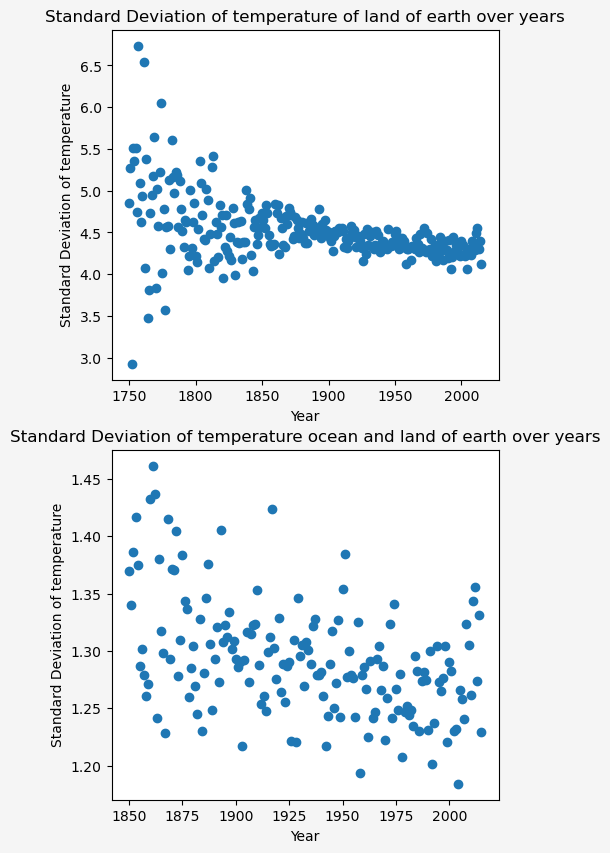

In [38]:
datapicked = YearStdGlobal
column_picked = ["LandAverageTemperature", "LandAndOceanAverageTemperature"]
fig, ax = plt.subplots(2, 1, figsize=(5, 10))

fig.set_facecolor((0.96, 0.96, 0.96))

for i in range(2):        
    ax[i].scatter(x=datapicked.index, y=datapicked[column_picked[i]])
    ax[i].set_xlabel("Year")
    ax[i].set_ylabel("Standard Deviation of temperature")
    
ax[0].set_title("Standard Deviation of temperature of land of earth over years")
ax[1].set_title("Standard Deviation of temperature ocean and land of earth over years")

#### Count how many years that the average temperature of land exceed 8.5 °C
There is a clear and concerning trend in the average temperature of land over time. Historical data reveals that from 1850 to 1870, there were no years with average temperatures exceeding 8.5°C. However, this changed dramatically in the following years as the number of years with such temperatures increased.

In recent times, the situation has become even more alarming. Between 1950 and 1990, and again from 1990 to 2010, every year recorded average land temperatures exceeding 8.5°C. This consistent rise in temperature is a significant cause for concern, and it highlights the urgency with which we must address the issue of climate change.

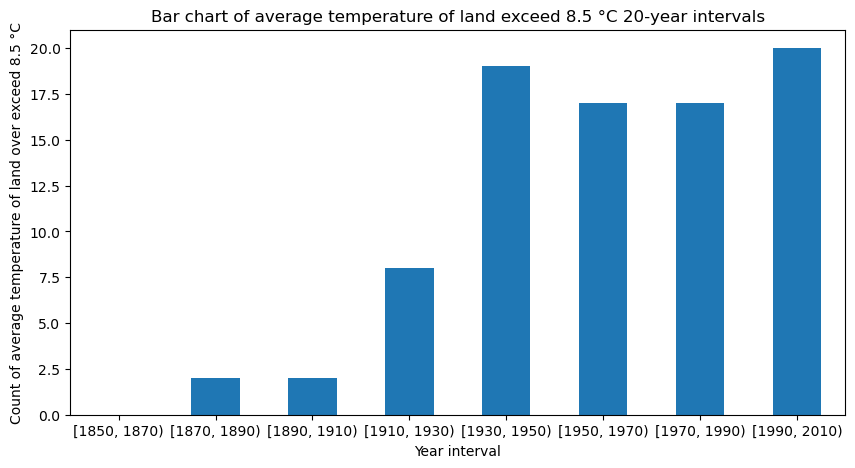

In [39]:
df = YearAverageGlobal


df['Year_bin'] = pd.cut(df.index, bins=range(1850, 2015, 20), right=False)
binned_data = df.groupby('Year_bin')['Land>=8.5'].sum()

plt.figure(figsize=(10,5))
binned_data.plot.bar(x='Year_bin', y='Land>=8.5', rot=0)
plt.xlabel('Year interval')
plt.ylabel('Count of average temperature of land over exceed 8.5 °C')
plt.title('Bar chart of average temperature of land exceed 8.5 °C 20-year intervals')
plt.show()

#### Count how many years that the average temperature of land plus ocean exceed 15.5 °C
It is evident from the data that there has been a significant increase in the average temperature of land and ocean over the last century. Between 1850 and 1970, there were no instances where the average temperature surpassed the 15.5°C threshold. However, this trend shifted during the period from 1970 to 1990, where only three years saw the temperature exceed the limit. This limited increase during the two decades is probably due to the early environmental regulations implemented by countries worldwide.

However, the subsequent two decades (1990-2010) witnessed a massive surge in global temperatures. There were 18 years during this time where the average temperature of land and ocean was recorded above the 15.5°C threshold. Such a significant and unprecedented increase in temperature can be attributed to the increasing levels of carbon dioxide and other greenhouse gases in the atmosphere, which trap heat and contribute to global warming.

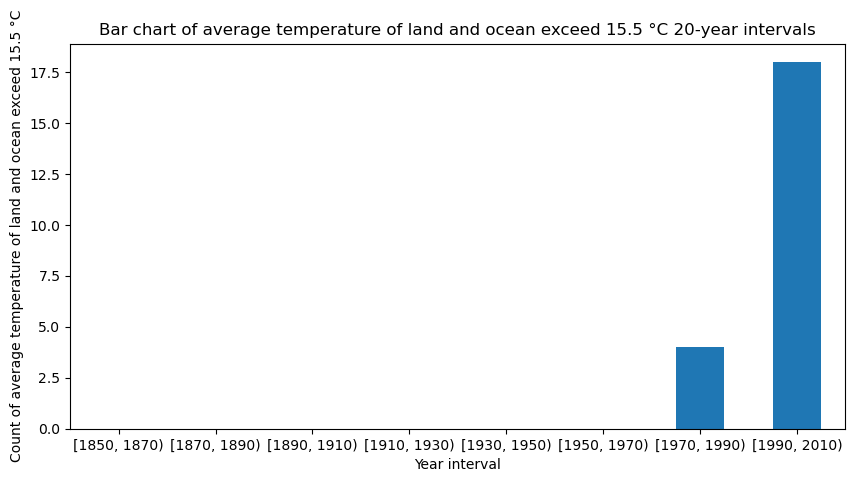

In [40]:
df = YearAverageGlobal


df['Year_bin'] = pd.cut(df.index, bins=range(1850, 2015, 20), right=False)
binned_data = df.groupby('Year_bin')['LandOcean>=15.5'].sum()

plt.figure(figsize=(10,5))
binned_data.plot.bar(x='Year_bin', y='LandOcean>=15.5', rot=0)
plt.xlabel('Year interval')
plt.ylabel('Count of average temperature of land and ocean exceed 15.5 °C')
plt.title('Bar chart of average temperature of land and ocean exceed 15.5 °C 20-year intervals')
plt.show()

#### Count how many years that the maximum temperature of land exceed 20.5 °C
Between 1850 and 1990, the maximum land temperature exceeding 20.5°C was a rare occurrence, with only 0 to 2 years experiencing such high temperatures in each 20-year interval. However, in the interval between 1990 and 2010, the trend shifted dramatically. During this period, the number of years with a maximum temperature above 20.5°C surged, with 14 years experiencing such high temperatures.

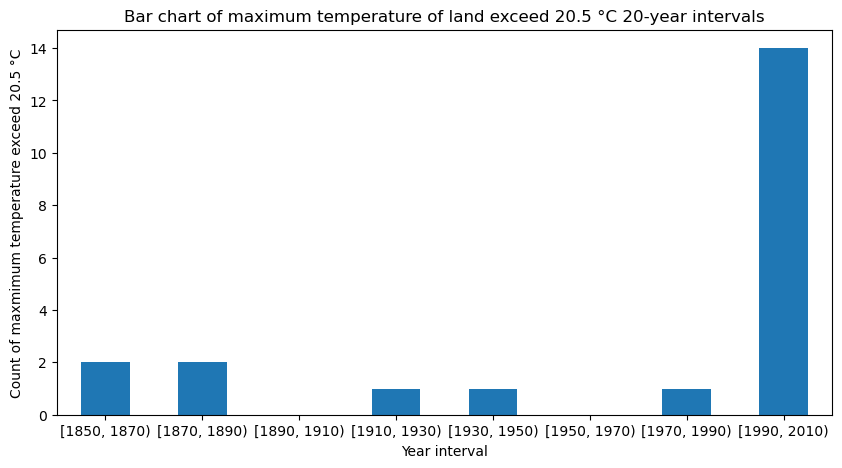

In [41]:
df = YearMaxGlobal

df['Year_bin'] = pd.cut(df.index, bins=range(1850, 2015, 20), right=False)
binned_data = df.groupby('Year_bin')['Land>=20.5'].sum()

plt.figure(figsize=(10,5))
binned_data.plot.bar(x='Year_bin', y='Land>=20.5', rot=0)
plt.xlabel('Year interval')
plt.ylabel('Count of maxmimum temperature exceed 20.5 °C')
plt.title('Bar chart of maximum temperature of land exceed 20.5 °C 20-year intervals')
plt.show()

#### Count how many years that the maximum temperature of land exceed 17 °C
Analysis of historical temperature data reveals that there has been a significant change in global temperature patterns over the past century. Between the years 1850 and 1930, there were typically no more than two years in any 20-year period where the maximum temperature of both land and ocean surfaces exceeded 17°C. However, since 1930, there has been a clear upward trend in global temperatures.

From 1930 to 1990, the number of years where the maximum temperature exceeded 17°C increased significantly. On average, there were 7.5 such years in each 20-year interval during this period. This trend continued into the 1990s, and between 1990 and 2010, every single year saw temperatures exceeding 17°C for both land and ocean surfaces. This trend suggests a continuing pattern of global warming that has accelerated in recent decades.

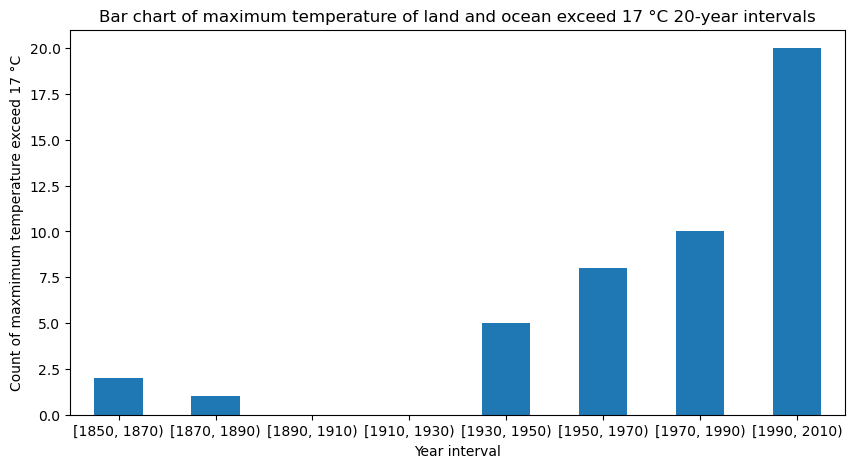

In [42]:
df = YearMaxGlobal

df['Year_bin'] = pd.cut(df.index, bins=range(1850, 2015, 20), right=False)
binned_data = df.groupby('Year_bin')['LandOcean>=17'].sum()

plt.figure(figsize=(10,5))
binned_data.plot.bar(x='Year_bin', y='LandOcean>=17', rot=0)
plt.xlabel('Year interval')
plt.ylabel('Count of maxmimum temperature exceed 17 °C')
plt.title('Bar chart of maximum temperature of land and ocean exceed 17 °C 20-year intervals')
plt.show()

### Summary 
These plots shows strong evidence of rising temperatures not only in specific cities, but also globally. The six cities located near 31N latitude all display an apparent increasing trend, with an average increase of 1-2°C over the last two centuries. The stability of the climate, reflected by the standard deviation and temperature difference, remains relatively unchanged over time, indicating that the temperature across these six cities is relatively stable across 12 months. Additionally, the average temperature of land and land plus ocean has risen approximately 1°C and 2°C, respectively, over the last two centuries, with a noticeable acceleration in the trend over the last 60 years. The maximum temperature for both land and land plus ocean also follows a similar trend to their average temperature. The standard deviation and temperature difference for both land and land plus ocean display a slight decreasing trend, indicating a less discrete global average temperature over the 12 months, with the coldest month being less cold than in the past. A comparison of average and maximum temperatures for both land and land plus ocean reveals an increase in the frequency of temperatures exceeding 8.5°C for land, 15.5°C for land plus ocean, 20.5°C for land, and 17°C for land plus ocean in the last century. All of these observations provide strong evidence that global warming is a real phenomenon.

# 2. Project Two

## 2.1 The Message
The main question surrounding global warming is whether the observed trends are occurring globally or only in certain areas. While studying the temperature of six cities and the global average, it was concluded that temperatures are rising by 1-2 degrees Celsius. However, this study alone may not be sufficient to draw any definitive conclusions. To gain a better understanding of whether temperature changes are happening uniformly across the globe, the next step would be instead of studying the average and maximum temperature globally changes over year (Y variables), it will be subgrouped by different continents and countries. This approach would allow for a better understanding of whether all locations are experiencing an increasing trend in temperature or if there are certain areas that are being affected more severely.

To gain a better understanding of global temperature trends, we will create several different line graphs that show how the average temperature of hottest month and average temperature of year of different countries changes over time within the same continent in the same graph. In order to make comparisons between different locations more meaningful, we will group together countries with similar average temperatures within the same graph. Additionally, we will average the temperature data for each continent using the individual country data and plot all continent trends in one graph. This will provide a more comprehensive overview of global temperature trends and allow for the identification of any significant patterns or anomalies. By using this approach, we hope to gain a more thorough understanding of the global temperature trends and their distribution across different regions.

In [43]:
import geopandas as gpd
from shapely.geometry import Point
from country_converter import CountryConverter
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

In [44]:
world = world[world['continent'] != 'Antarctica']

In [45]:
country_temp_copy = country_temp.copy()
country_temp_copy["dt"] = country_temp_copy["dt"].astype(str)
for row in country_temp_copy.iterrows():
    index_value, column_value = row
    
    time = column_value["dt"]
    
    country_temp_copy.at[index_value, "Year"] = int(time[0:4])

In [46]:
year_country_temp = country_temp_copy

In [47]:
import pandas as pd
import pycountry_convert as pc

df = year_country_temp

def get_continent(row):
    try:
        country_code = pc.country_name_to_country_alpha2(row['Country'])
        continent_code = pc.country_alpha2_to_continent_code(country_code)
        return continent_code
    except KeyError:
        return None

df['continent'] = df.apply(get_continent, axis=1)
year_country_temp = df

In [48]:
avg_year_country_temp = year_country_temp.groupby(["Country", "Year", "continent"]).mean()

In [49]:
max_year_country_temp = year_country_temp.groupby(["Country", "Year", "continent"]).max()

In [50]:
avg_year_country_temp.reset_index(inplace=True)
max_year_country_temp.reset_index(inplace=True)
x = set(year_country_temp["continent"])

In [51]:
avg_year_country_temp.set_index("continent", inplace=True)
max_year_country_temp.set_index("continent", inplace=True)

In [52]:
def plot_function(df, kind, continent):
    temp_by_country = df.groupby('Country')['AverageTemperature'].mean()
    df = df.merge(temp_by_country, on='Country', suffixes=('', '_avg'))
    df = df.sort_values('AverageTemperature_avg')
    countries = df['Country'].unique() 
    
    for i, ax in enumerate(axs.flatten()): 
        if i >= len(countries): 
            break
        start = i * 5 
        end = min((i + 1) * 5, len(countries)) 
        chunk = countries[start:end] 
        data = df[df['Country'].isin(chunk)] 
        pivoted_data = pd.pivot_table(data, values='AverageTemperature', index='Year', columns='Country')
        pivoted_data.iloc[::5, :].plot(ax=ax, kind='line', linewidth=1, markersize=5) 
        ax.set_title(f'Countries {start+1}-{end}') 
        ax.set_xlabel('Year') 
        ax.set_ylabel('Temperature (C)') 
        ax.set_xlim(1850, 2015)
        min_temp = pivoted_data.loc[pivoted_data.index >= 1870].min().min()
        max_temp = pivoted_data.loc[pivoted_data.index <= 2015].max().max()
        ax.set_ylim(min_temp, max_temp)
        ax.legend(fontsize=6)

    df = df.drop('AverageTemperature_avg', axis=1)
    plt.suptitle(kind + ' Temperature Trends by Country in ' + continent) 
    plt.tight_layout() 
    plt.show()

### Avearage and Hottest month temperature trend in North America
The graph showing the average temperature of countries in North America from 1850 to 2015 reveals a significant trend of increasing temperatures over time. The data collected every five years indicates that the temperature of all countries in North America has increased by approximately 2 degrees Celsius during this time period. This finding is consistent with global temperature trends and supports the idea that climate change is happening and affecting regions around the world, including North America. The data presented in this graph could be used to further investigate the causes and consequences of rising temperatures in North America

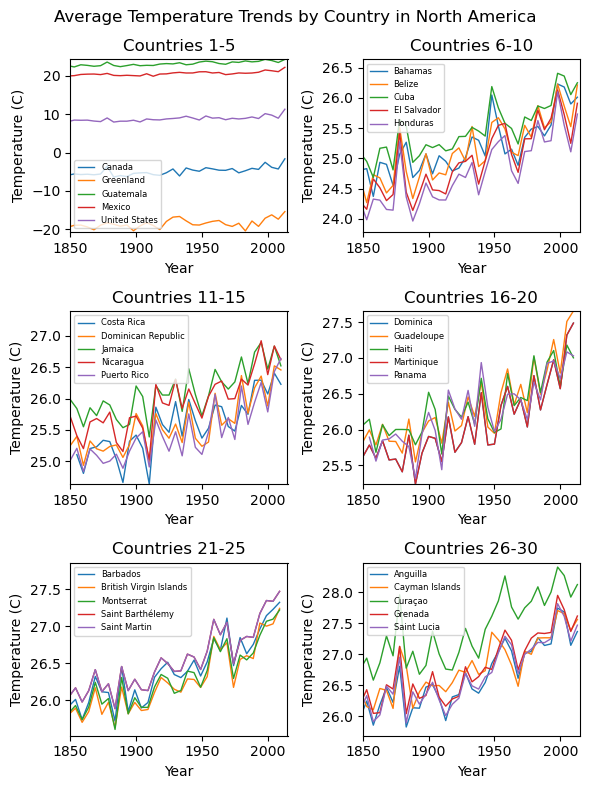

In [53]:
fig, axs = plt.subplots(3, 2, figsize=(6, 8)) 
df = avg_year_country_temp.loc["NA"]
df.reset_index(inplace=True)

plot_function(df, "Average", "North America")

The graph of the hottest month average temperature of countries in North America, based on data collected every five years between 1850 and 2015, shows an overall increase in temperature of around 1 degree Celsius for most countries in the region. However, there are five countries - Costa Rica, El Salvador, Honduras, Panama, and Puerto Rico - that have not exhibited a significant increase in their hottest month average temperature over the past 160 years. This data suggests that there may be certain factors unique to these countries that are buffering them from the global warming trend. Further research is needed to identify these factors and their potential impact on the overall temperature trends in North America. 

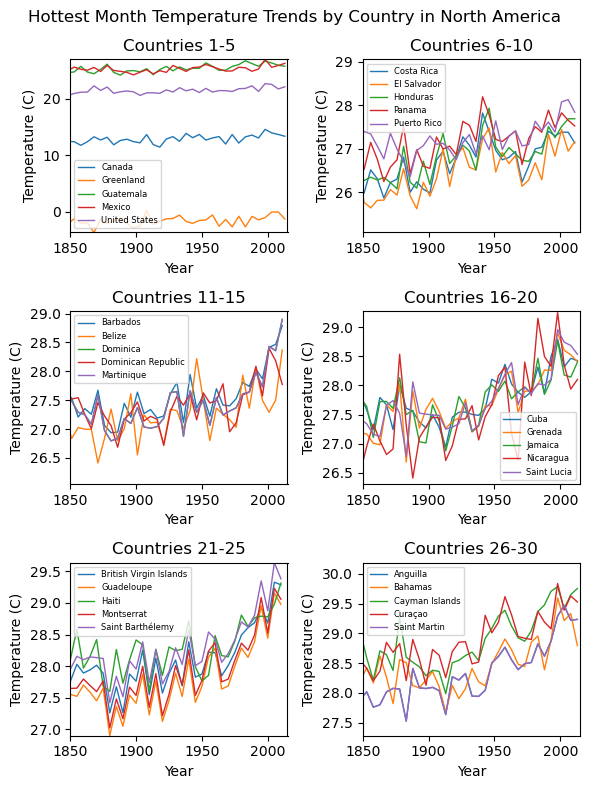

In [54]:
fig, axs = plt.subplots(3, 2, figsize=(6, 8)) 
df = max_year_country_temp.loc["NA"]
df.reset_index(inplace=True)

plot_function(df, "Hottest Month", "North America")

### Avearage and Hottest month temperature trend in South America
The data, collected every five years. The graph showing the average temperature of countries in South America over a period of 165 years, from 1850 to 2015, reveals that the temperature of all countries has increased between 1 to 2 degrees Celsius during this time frame. This indicates a clear and consistent trend of warming in the region over the last century and a half. Additionally, the graph highlights that three countries in particular, French Guiana, Guyana, and Suriname, have experienced an increasing trend in their average temperature over this period, indicating that these countries may be more vulnerable to the impacts of global warming than others in the region. 

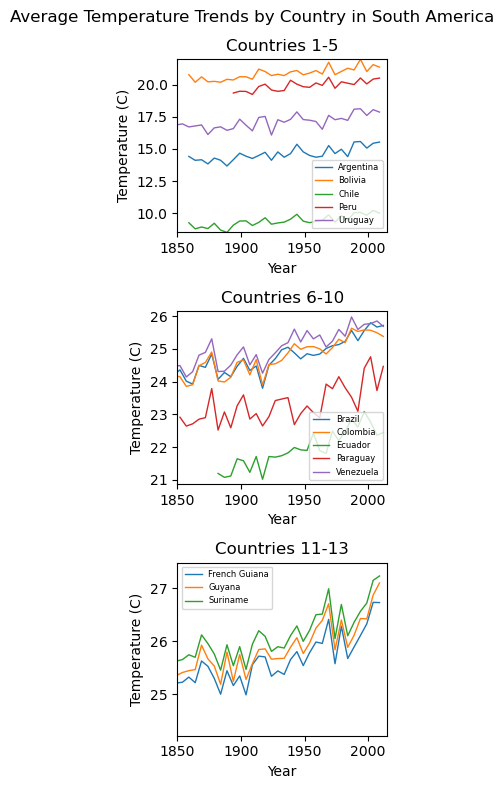

In [55]:
fig, axs = plt.subplots(3, 1, figsize=(3, 8)) 
df = avg_year_country_temp.loc["SA"]
df.reset_index(inplace=True)

plot_function(df, "Average", "South America")

The data, collected every five years. The graph shows the hottest month average temperature of countries in South America from 1850 to 2015. We can observe that all countries in South America have experienced an increase in temperature during this period, with an overall rise of 1-2 degrees Celsius. Interestingly, unlike the average temperature graph, the hottest month average temperature graph shows a consistent upward trend without significant fluctuations. This indicates that the increase in temperature is not limited to a specific period of the year, but rather affects the region throughout the year. These findings align with the global trend of increasing temperatures due to climate change. 

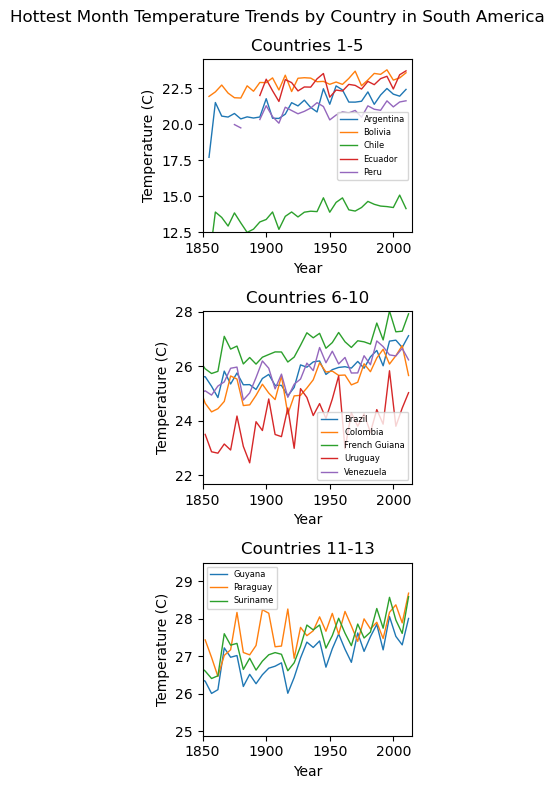

In [56]:
fig, axs = plt.subplots(3, 1, figsize=(3, 8)) 
df = max_year_country_temp.loc["SA"]
df.reset_index(inplace=True)

plot_function(df, "Hottest Month", "South America")

### Avearage and Hottest month temperature trend in Asia
The data, collected every five years. The graph shows the average temperature of countries in Asia from 1850 to 2015. The data reveals that like other continents, all the countries in Asia have experienced an increase in temperature ranging from 1 to 2 degrees Celsius during this time period. However, some countries in Asia, such as Bahrain, Yemen, Cambodia, Oman, Philippines, Qatar, and Singapore, have shown a significant boost in their temperature trends after 1970. This increase may be due to various factors, such as rapid urbanization, industrialization, and increased use of fossil fuels in these countries during this period. 

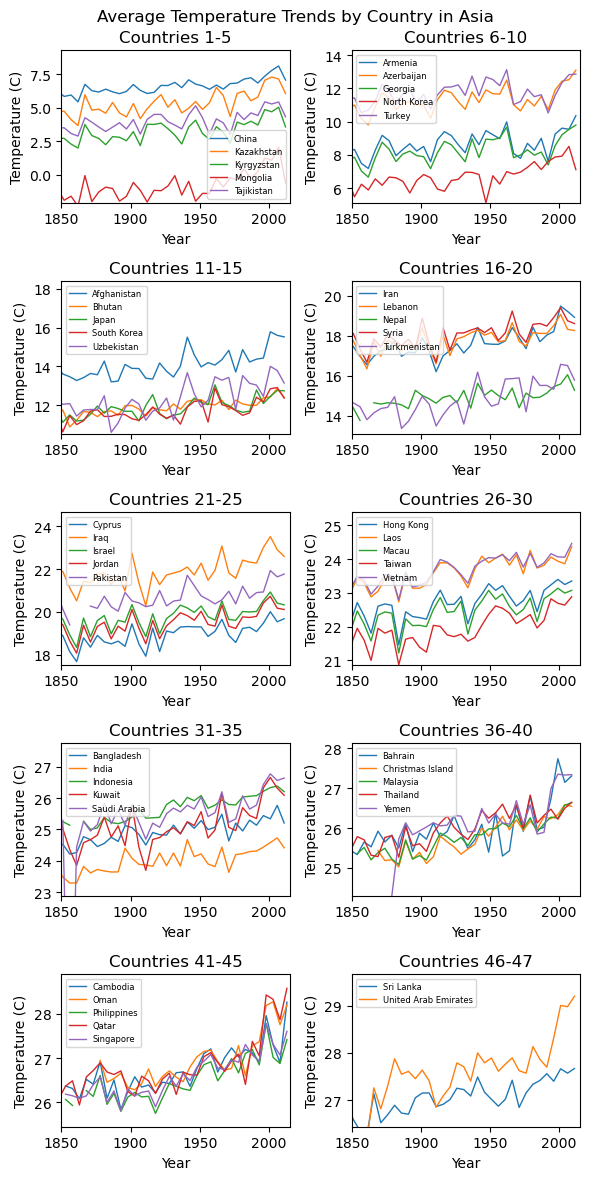

In [57]:
fig, axs = plt.subplots(5, 2, figsize=(6, 12)) 
df = avg_year_country_temp.loc["AS"]
df.reset_index(inplace=True)

plot_function(df, "Average", "Asia")

The data, collected every five years. The graph of hottest month average temperature of countries in Asia shows a different pattern compared to the graph of average temperature. The graph depicts a more fluctuating trend, with many countries showing a marked increase in temperature during the hottest month of the year. The data reveals that most countries in Asia have experienced a significant increase in temperature during their hottest month, with some countries exhibiting more extreme changes than others. 

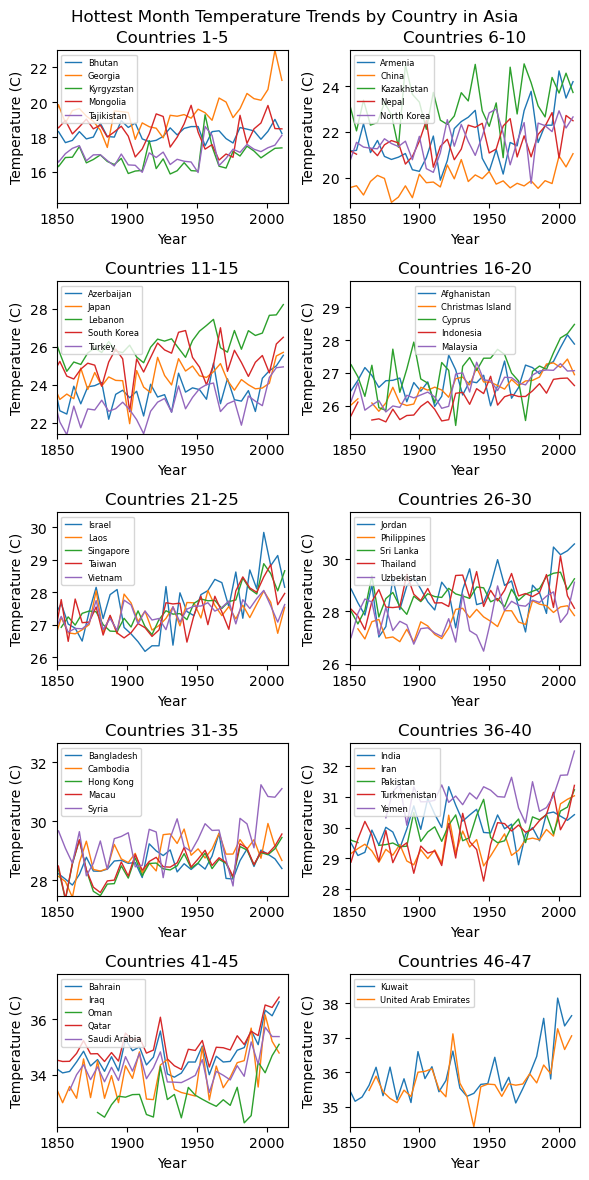

In [58]:
fig, axs = plt.subplots(5, 2, figsize=(6, 12)) 
df = max_year_country_temp.loc["AS"]
df.reset_index(inplace=True)

plot_function(df, "Hottest Month", "Asia")

### Avearage and Hottest month temperature trend in Europe

The data, collected every five years. The graph of the average temperature of countries in Europe indicates that most countries have a relatively lower and more fluctuating temperature overall when compared to other continents such as North America, Asia, and South America. However, it is evident that the majority of European countries have experienced an increase of 1-2 degree Celsius from 1850 to 2015, with most of them showing a continuous upward trend. It is important to note that while the temperature increase is not as significant as in other continents, the fluctuation of temperatures can still have a substantial impact on the environment, ecosystems, and society.

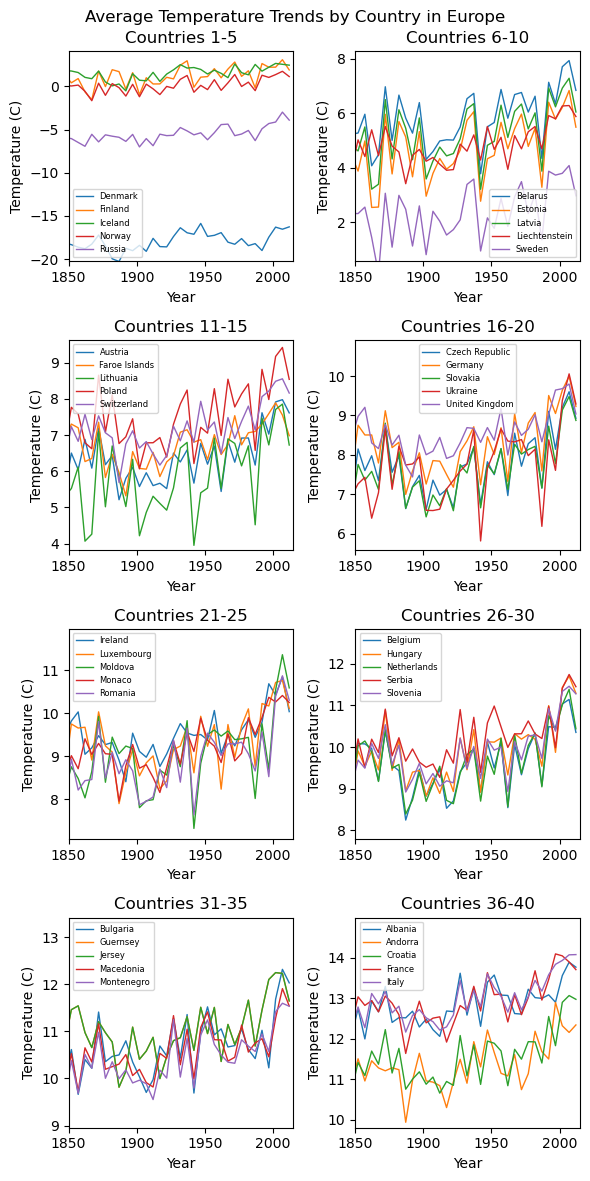

In [59]:
fig, axs = plt.subplots(4, 2, figsize=(6, 12)) 
df = avg_year_country_temp.loc["EU"]
df.reset_index(inplace=True)

plot_function(df, "Average", "Europe")

The data, collected every five years. The graph shows the hottest month average temperature of European countries from 1850 to 2015. Compared to the average yearly temperature, the hottest month temperature has more fluctuations, with some countries showing higher peaks in certain years. Despite the fluctuations, the overall trend shows that most countries in Europe have experienced an increase of 1-2 degree Celsius in their hottest month temperature over the past 165 years. This increase is consistent with the trend observed in the average yearly temperature. Countries such as Germany, France, Italy, Spain, and the United Kingdom have shown a consistent increasing trend in their hottest month temperature, with some of them exhibiting a more rapid increase after the 1970s. 

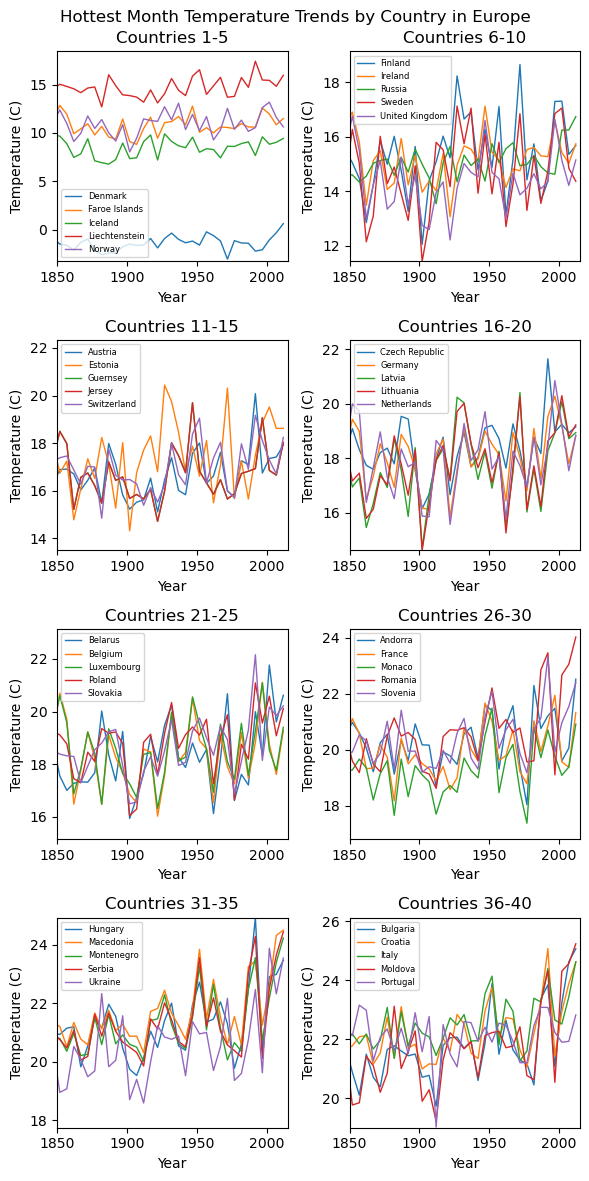

In [60]:
fig, axs = plt.subplots(4, 2, figsize=(6, 12)) 
df = max_year_country_temp.loc["EU"]
df.reset_index(inplace=True)

plot_function(df, "Hottest Month", "Europe")

### Avearage and Hottest monthtemperature trend in Africa

The graph shows the average temperature of countries in Africa every five years from 1850 to 2015. The data indicates that almost all the countries in Africa have experienced an increasing trend in temperature since 1975, with some countries having a steeper rise than others. This trend is consistent with the global warming phenomenon and suggests that Africa is also affected by climate change. Moreover, the graph reveals that the average temperature of all countries in Africa has increased by 1-2 degrees Celsius from 1850 to 2015. 

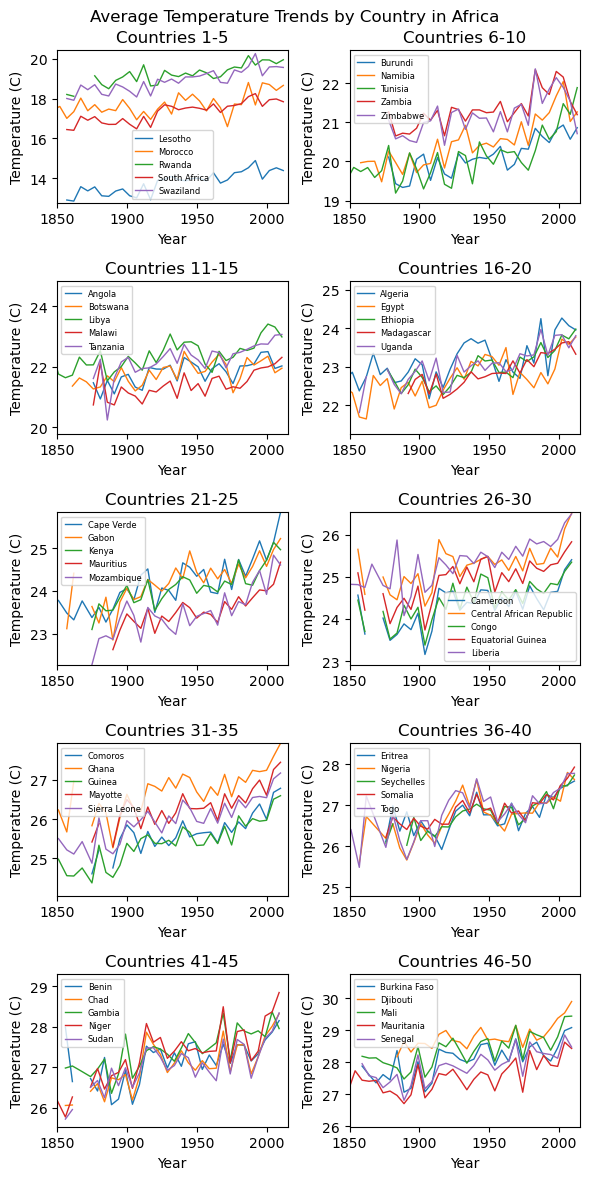

In [61]:
fig, axs = plt.subplots(5, 2, figsize=(6, 12)) 
df = avg_year_country_temp.loc["AF"]
df.reset_index(inplace=True)

plot_function(df, "Average", "Africa")

The graph displaying the hottest month average temperature of countries in Africa, with data points shown every five years, exhibits a similar trend to that of the average yearly temperature. The temperature of almost all the countries in Africa shows a significant increase after 1975. Moreover, the average temperature of all the countries in Africa has increased by approximately 1-2 degree Celsius. Rising temperatures could lead to an increase in droughts, which may have a devastating impact on agriculture and food security, leading to a rise in malnutrition and starvation. Overall, the rise in the hottest month average temperature for most African countries over the last 1.5 century could have a significant impact on the continent's social, economic, and environmental well-being.

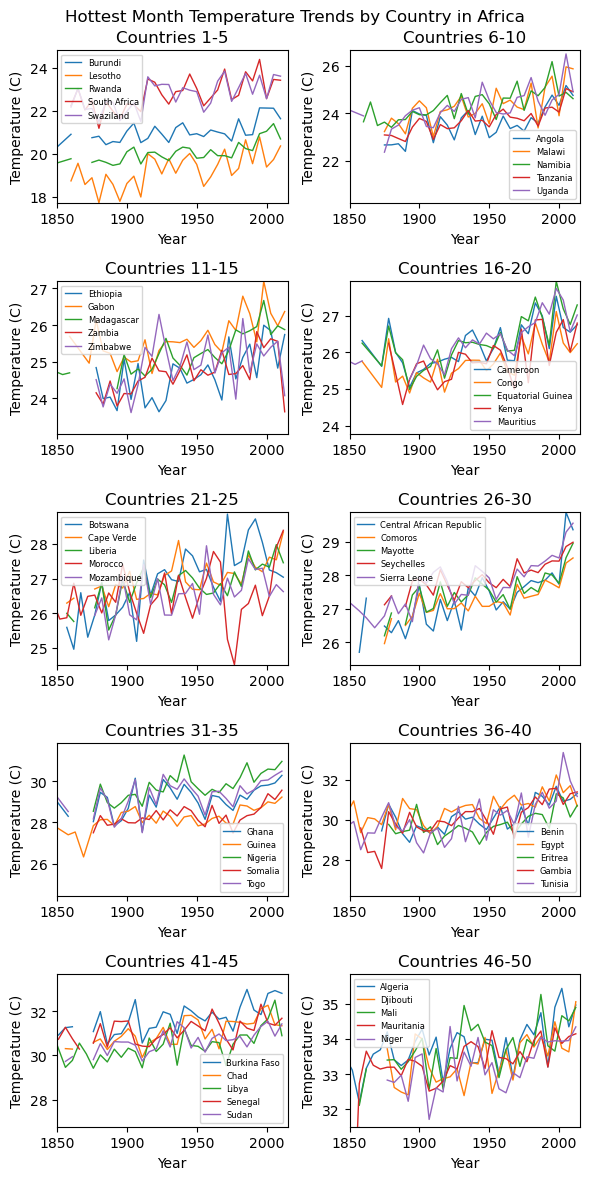

In [62]:
fig, axs = plt.subplots(5, 2, figsize=(6, 12)) 
df = max_year_country_temp.loc["AF"]
df.reset_index(inplace=True)

plot_function(df, "Hottest Month", "Africa")

### Avearage and Hottest month temperature trend in Oceania

The graph represents the average temperature of countries in Oceania, with data points shown every five years. The trend in temperature change is alarming, as almost all the countries show a significant increase in temperature after 1975. The average temperature of all the countries in Oceania has increased by a staggering 2 degree Celsius. This temperature rise is steady and consistent for the past 150 years, indicating a significant warming trend in the region. The Pacific Islands are particularly vulnerable to the impacts of climate change, including rising sea levels and increased frequency of extreme weather events. 

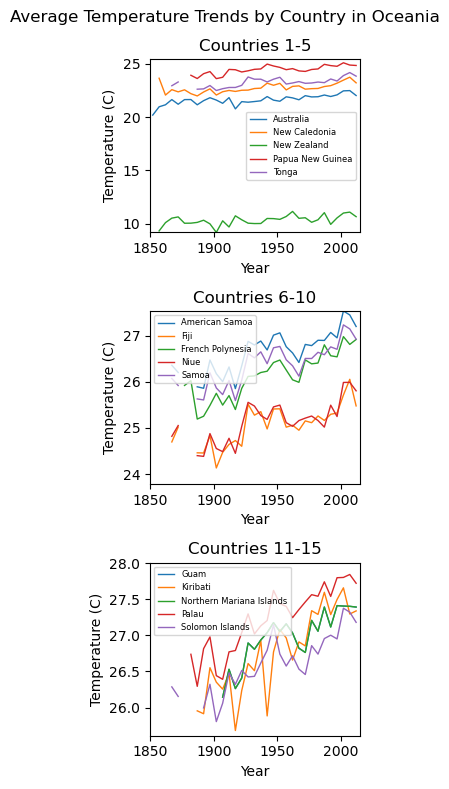

In [63]:
fig, axs = plt.subplots(3, 1, figsize=(3, 8)) 
df = avg_year_country_temp.loc["OC"]
df.reset_index(inplace=True)

plot_function(df, "Average", "Oceania")

The graph displaying the hottest month average temperature of countries in Oceania, with data points shown every five years, shows a significant increase in temperature after 1975. The average temperature of all countries in Oceania has increased by approximately 2 degrees Celsius over the past 1.5 centuries. This increase is steady and has been observed for a long time. The rising temperature in Oceania can be attributed to various factors such as global warming, greenhouse gases, and human activities. 

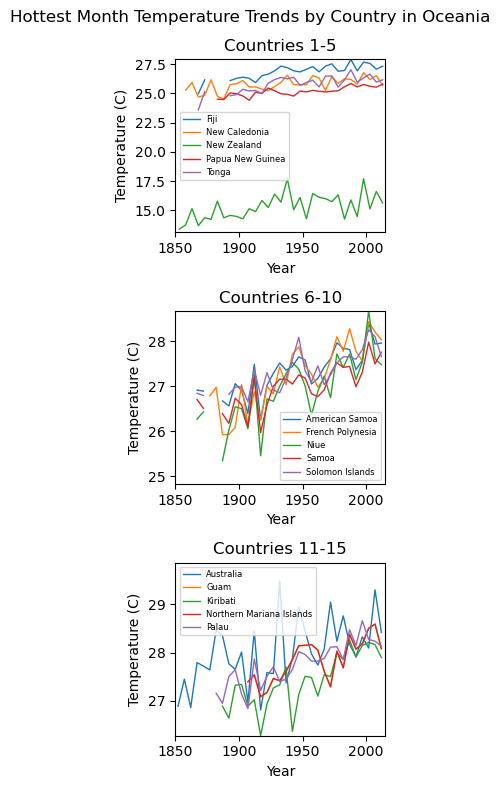

In [64]:
fig, axs = plt.subplots(3, 1, figsize=(3, 8)) 
df = max_year_country_temp.loc["OC"]
df.reset_index(inplace=True)

plot_function(df, "Hottest Month", "Oceania")

In [65]:
no_index_avg = avg_year_country_temp.reset_index()
avg_year_continent_temp = no_index_avg.groupby(["continent", "Year"]).mean().reset_index()
no_index_max = max_year_country_temp.reset_index()
max_year_continent_temp = no_index_max.groupby(["continent", "Year"]).max().reset_index()

In [66]:
pivoted_avg_year_continent = pd.pivot_table(avg_year_continent_temp, values='AverageTemperature', index='Year', columns='continent')
pivoted_max_year_continent = pd.pivot_table(max_year_continent_temp, values='AverageTemperature', index='Year', columns='continent')

### Avearage and Hottest month temperature trend by Continents
The graph displays the average temperature for each continent, calculated by averaging the temperature of all countries within the continent for each year. The data indicates a significant and consistent increase in average temperature across all continents including North America, South America, Asia, Africa, Oceania, and Europe over the past 150 years. The increase is relatively steady. Notably, Europe has been the most fluctuate of all the continents. Moreover, we can observe that all continents have experienced an upward trend in temperature since around 1960. Notably, Europe has been the most fluctuate of all the continents. Moreover, we can observe that all continents have experienced an upward trend in temperature since around 1960. These findings indicate a pressing need to address climate change on a global scale, as the increasing temperatures could have significant ecological and societal impacts.

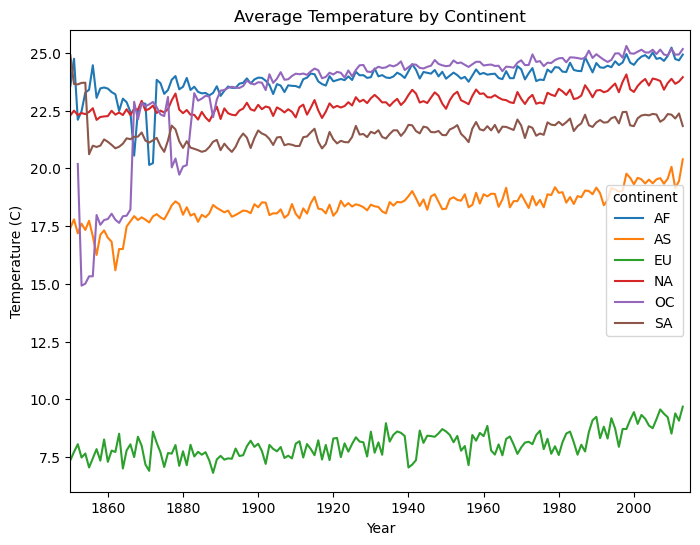

In [67]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6)) 
pivoted_avg_year_continent.plot(ax=ax, kind='line')

# set the title and axis labels
ax.set_title('Average Temperature by Continent')
ax.set_xlabel('Year')
ax.set_ylabel('Temperature (C)')
ax.set_xlim(1850,2015)
ax.set_ylim(6,26)
# show the plot
plt.show()


The graph displays the hottest month average temperature of each continent, where the data is obtained by averaging all the countries' temperatures in that continent in that year. It shows that all the continents, namely North America, South America, Asia, Africa, Oceania, and Europe, have experienced a steady increase in temperature for the past 1.5 centuries. The temperature in Europe is observed to be the most fluctuating among the continents, with significant temperature variations over the years. Additionally, all the continents have shown an increasing trend after 1960, with Asia and Europe demonstrating a significant rise in temperature during this period. This trend is an alarming indication of the ongoing global warming issue and requires immediate action to curb further temperature rise and prevent adverse consequences on the planet's environment and its inhabitants.

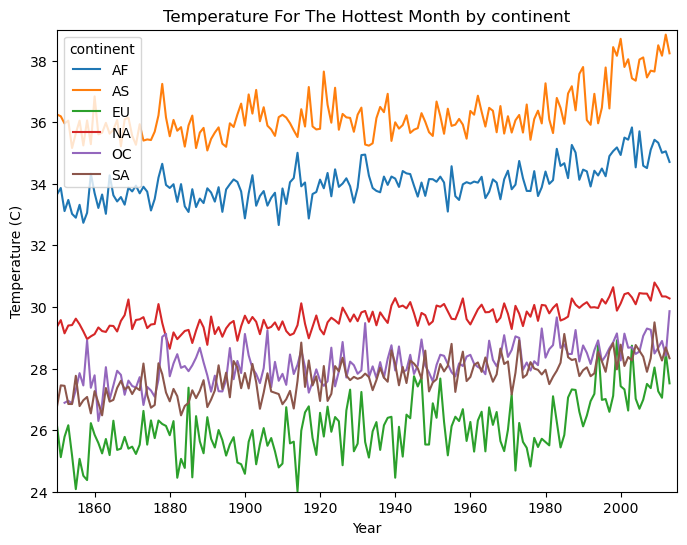

In [68]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6)) 
pivoted_max_year_continent.plot(ax=ax, kind='line')

# set the title and axis labels
ax.set_title('Temperature For The Hottest Month by continent')
ax.set_xlabel('Year')
ax.set_ylabel('Temperature (C)')
ax.set_xlim(1850,2015)
ax.set_ylim(24,39)
# show the plot
plt.show()

### Summary
The analyzed graphs, which display the average and hottest month temperatures of various continents, all point towards a global trend of rising temperatures. In each continent, from North America to South America, Asia, Africa, Oceania, and Europe, there has been a steady increase in temperatures over the past 1.5 centuries. Europe's average temperature, in particular, shows more fluctuations compared to other continents. However, it still displays a clear upward trend, as do all other continents. This trend is particularly evident after 1960, with Asia and Europe experiencing a significant increase in temperature. The overall pattern suggests that global warming trends are indeed occurring globally, and not just in certain areas. These graphs serve as evidence that the Earth's climate is changing and that action needs to be taken to mitigate the negative impacts of rising temperatures.

## 2.2 Maps and Interpretations

In order to understand the extent to which global warming trends are occurring globally, it is important to examine various factors that contribute to climate change. The maps that will be analyzed in the next part of this project provide crucial insights into the impact of human activities on the environment. The average year temperature difference and the hottest month temperature difference between 1850 and 2015 will allow us to examine the long-term trend in temperature changes and how they differ across regions. The average historical carbon emissions of different countries will give us an idea of the contribution of each country to the global carbon footprint. Finally, exploring the electricity generation and fossil fuel usage in 2018 for different countries will help us to understand the current state of affairs and identify areas where immediate action is needed. By considering these various aspects, we will be able to draw a more comprehensive conclusion about the global warming trends occurring across the globe.

### Merging with New Datasets
The new datasets we have chosen, which record carbon emissions from worldbank and energy usage from kaggle for all countries, are crucial to answering the question of whether global warming trends are occurring globally or only in certain areas. Carbon emissions are the main contributor to global warming, and tracking their levels across different countries and regions can help identify the areas where the most significant changes are happening. Moreover, energy usage is closely linked to carbon emissions, as much of the energy we consume comes from burning fossil fuels, which releases carbon dioxide into the atmosphere. By analyzing these datasets, we can gain insights into which countries and regions are the most significant contributors to carbon emissions and how they are using energy, which will help you better understand the global patterns of climate change. Overall, these datasets are critical for understanding the broader picture of climate change and its impact on our planet.

In [69]:
from country_converter import CountryConverter
cc = CountryConverter()

In [70]:
avg_year_country_temp_copy = avg_year_country_temp.reset_index().copy()
avg_year_country_temp_copy['ISO_A3'] = avg_year_country_temp_copy['Country'].apply(lambda x: cc.convert(names=x, to='ISO3') if pd.notnull(x) else None)

max_year_country_temp_copy = max_year_country_temp.reset_index().copy()
max_year_country_temp_copy['ISO_A3'] = max_year_country_temp_copy['Country'].apply(lambda x: cc.convert(names=x, to='ISO3') if pd.notnull(x) else None)

In [71]:
merged_avg_country = avg_year_country_temp_copy.merge(world, left_on='ISO_A3', right_on='iso_a3')
merged_max_country = max_year_country_temp_copy.merge(world, left_on='ISO_A3', right_on='iso_a3')

In [72]:
pivoted_data = merged_avg_country.pivot_table(index='Country', columns='Year', values='AverageTemperature')
temp_diff = pivoted_data[2010] - pivoted_data[1900]
merged_avg_country['TempDiff'] = merged_avg_country['Country'].map(temp_diff)

pivoted_data = merged_max_country.pivot_table(index='Country', columns='Year', values='AverageTemperature')
temp_diff = pivoted_data[2010] - pivoted_data[1900]
merged_max_country['TempDiff'] = merged_avg_country['Country'].map(temp_diff)

In [74]:
file_path = "/Users/nick0o0o0/Library/Mobile Documents/com~apple~CloudDocs/gxyfile/third_year/ECO225/archive/"

carbon_country = pd.read_csv(file_path + "API_EN.ATM.CO2E.PC_DS2_en_csv_v2_4888899.csv")

In [75]:
carbon_country['Max Emission'] = carbon_country.iloc[:, 4:].mean(axis=1)

short_carbon = carbon_country[['Country Code', "Max Emission"]]
merged_carbon = merged_avg_country.merge(short_carbon, left_on="iso_a3", right_on="Country Code")

### Global Maps of Climate Change and Carbon Emissions by Country
The following maps provide visual representations of important climate and environmental data for various countries around the world. The first map shows the average temperature difference between 2010 and 1900 in degrees Celsius, highlighting areas where the greatest increases in temperature have occurred over the past century. The second map displays the difference in temperature for the hottest month between 2010 and 1900, providing insights into how climate change has affected seasonal temperatures in different regions. Finally, the third map presents the average historical carbon emissions per capita by country in metric tons, offering a glimpse into the varying contributions to global carbon emissions across different nations. The annotations on each map highlight specific countries of interest, such as China, Australia, Saudi Arabia, Greenland, America, and Canada, and offer insights into how these countries are impacted by climate change or contribute to global carbon emissions.

The first map shows the average temperature difference between 2010 and 1900 for various countries. It is observed that countries in North America such as Canada and Greenland have experienced a significant temperature change over the years. Similarly, countries in North Africa and West Asia, which are annotated on the map as being around Saudi Arabia, have also experienced a significant temperature change.

However, the second map, which shows the difference in temperature for the hottest month between 2010 and 1900, presents a different trend. It is observed that Europe has been most impacted by the change in temperature, as most areas in the region have experienced a big difference for the hottest month between the two time periods. It present a week correlation with average tempreature map. Some countries in Europe are outliers that even they don't have significant change with average temperature, but their hottest month temperature increases significantly.

The third map shows the average historical carbon emissions per capita by country, which indicates a strong correlation between carbon emissions and average temperature. Interestingly, Canada in North America and the region around Saudi Arabia, in North Africa and West Asia, have both high carbon emissions per capita and significant temperature changes between 1900 and 2010. This suggests that high carbon emissions are contributing to global warming in these regions. Australia, on the other hand, is an outlier, with high carbon emissions per capita but relatively low temperature change and almost no change in the hottest month between 1900 and 2010. This could be due to a variety of factors, such as differences in climate or energy sources. However, it is clear that efforts to reduce carbon emissions need to be implemented globally to address the issue of global warming.

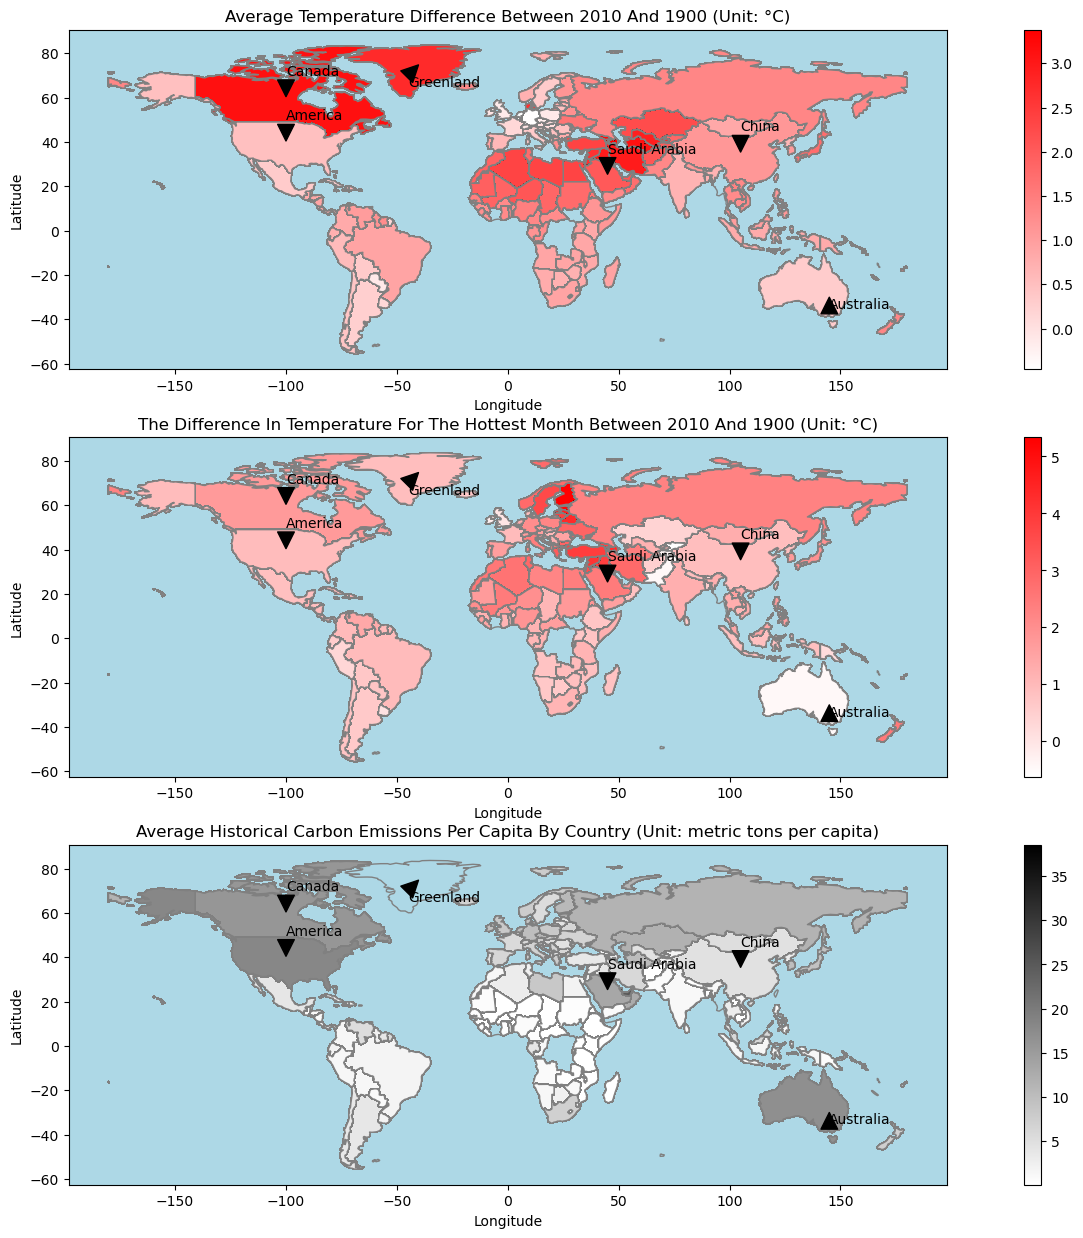

In [76]:
import matplotlib.colors as colors

border_color = 'gray'
cmap1 = colors.LinearSegmentedColormap.from_list('custom', [(1, 1, 1), (1, 0, 0)])
cmap2 = colors.LinearSegmentedColormap.from_list('custom', [(1, 1, 1), (0, 0, 0)])

fig, ax = plt.subplots(3, 1, figsize=(20,15))

for i in range(3):
    world.plot(ax=ax[i], facecolor='none', edgecolor=border_color)
    ax[i].set_facecolor('lightblue')
    
gdf = gpd.GeoDataFrame(merged_avg_country)
gdf.plot(ax=ax[0], column='TempDiff', cmap=cmap1, legend=True, edgecolor=border_color)
ax[0].set_title('Average Temperature Difference Between 2010 And 1900 (Unit: °C)')

gdf = gpd.GeoDataFrame(merged_max_country)
gdf.plot(ax=ax[1], column='TempDiff', cmap=cmap1, legend=True, edgecolor=border_color)
ax[1].set_title('The Difference In Temperature For The Hottest Month Between 2010 And 1900 (Unit: °C)')

gdf = gpd.GeoDataFrame(merged_carbon)
gdf.plot(ax=ax[2], column='Max Emission', cmap=cmap2, legend=True, edgecolor=border_color)
ax[2].set_title('Average Historical Carbon Emissions Per Capita By Country (Unit: metric tons per capita)')

for i in range(3):
    ax[i].set_xlabel('Longitude')
    ax[i].set_ylabel('Latitude')
    ax[i].set_aspect('equal')

for i in range(3):
    ax[i].annotate('China', xy=(105, 35), xytext=(105, 45), fontsize=10,
                arrowprops=dict(facecolor='black', shrink=0.05))
    ax[i].annotate('Australia', xy=(145, -30), xytext=(145, -35), fontsize=10,
                arrowprops=dict(facecolor='black', shrink=0.05))
    ax[i].annotate('Saudi Arabia', xy=(45, 25), xytext=(45, 35), fontsize=10,
                arrowprops=dict(facecolor='black', shrink=0.05))
    ax[i].annotate('Greenland', xy=(-40, 75), xytext=(-45, 65), fontsize=10,
                arrowprops=dict(facecolor='black', shrink=0.05))
    ax[i].annotate('America', xy=(-100, 40), xytext=(-100, 50), fontsize=10,
                arrowprops=dict(facecolor='black', shrink=0.05))
    ax[i].annotate('Canada', xy=(-100, 60), xytext=(-100, 70), fontsize=10,
                arrowprops=dict(facecolor='black', shrink=0.05))

plt.show()

In [77]:
energy_consumption = pd.read_csv(file_path + 'World Energy Consumption.csv')

In [78]:
energy_consumption2018 = energy_consumption.set_index('year').loc[2018]

### Comparing Electricity Generation, Fossil Fuel Consumption in 2018
The following maps illustrate the global distribution of electricity generation and fossil fuel consumption in 2018, measured in terawatt-hours (TWh). The maps display data for each country, with darker shades indicating higher levels of electricity generation or fossil fuel consumption. 

Based on the given maps, we can observe that there is a high correlation between fossil fuel consumption and electricity generation. The countries that have a higher electricity generation rate also tend to have a higher consumption rate of fossil fuels. This indicate that most countries use the fossil fuel as a big portion to generate electriciy. The data reveals that China leads the world in both categories, followed by the United States. Surprisingly, despite being the biggest electricity producer and fossil fuel consumer, China does not have the highest carbon emissions per capita, which may be due to its large population bringing down the average. The United States is also a significant contributor to global electricity generation and fossil fuel consumption, yet both countries have experienced relatively smaller temperature changes compared to other countries. This suggests that high electricity generation and fossil fuel consumption alone do not necessarily translate to significant temperature changes. However, it may also due to these two conturies are significantly high with electricity generation and fossil fuel consumption compare to other contries as two outliers. We will next to see electricity generation per capita and fossil fuel consumption per capita, find their relation with temperature change.

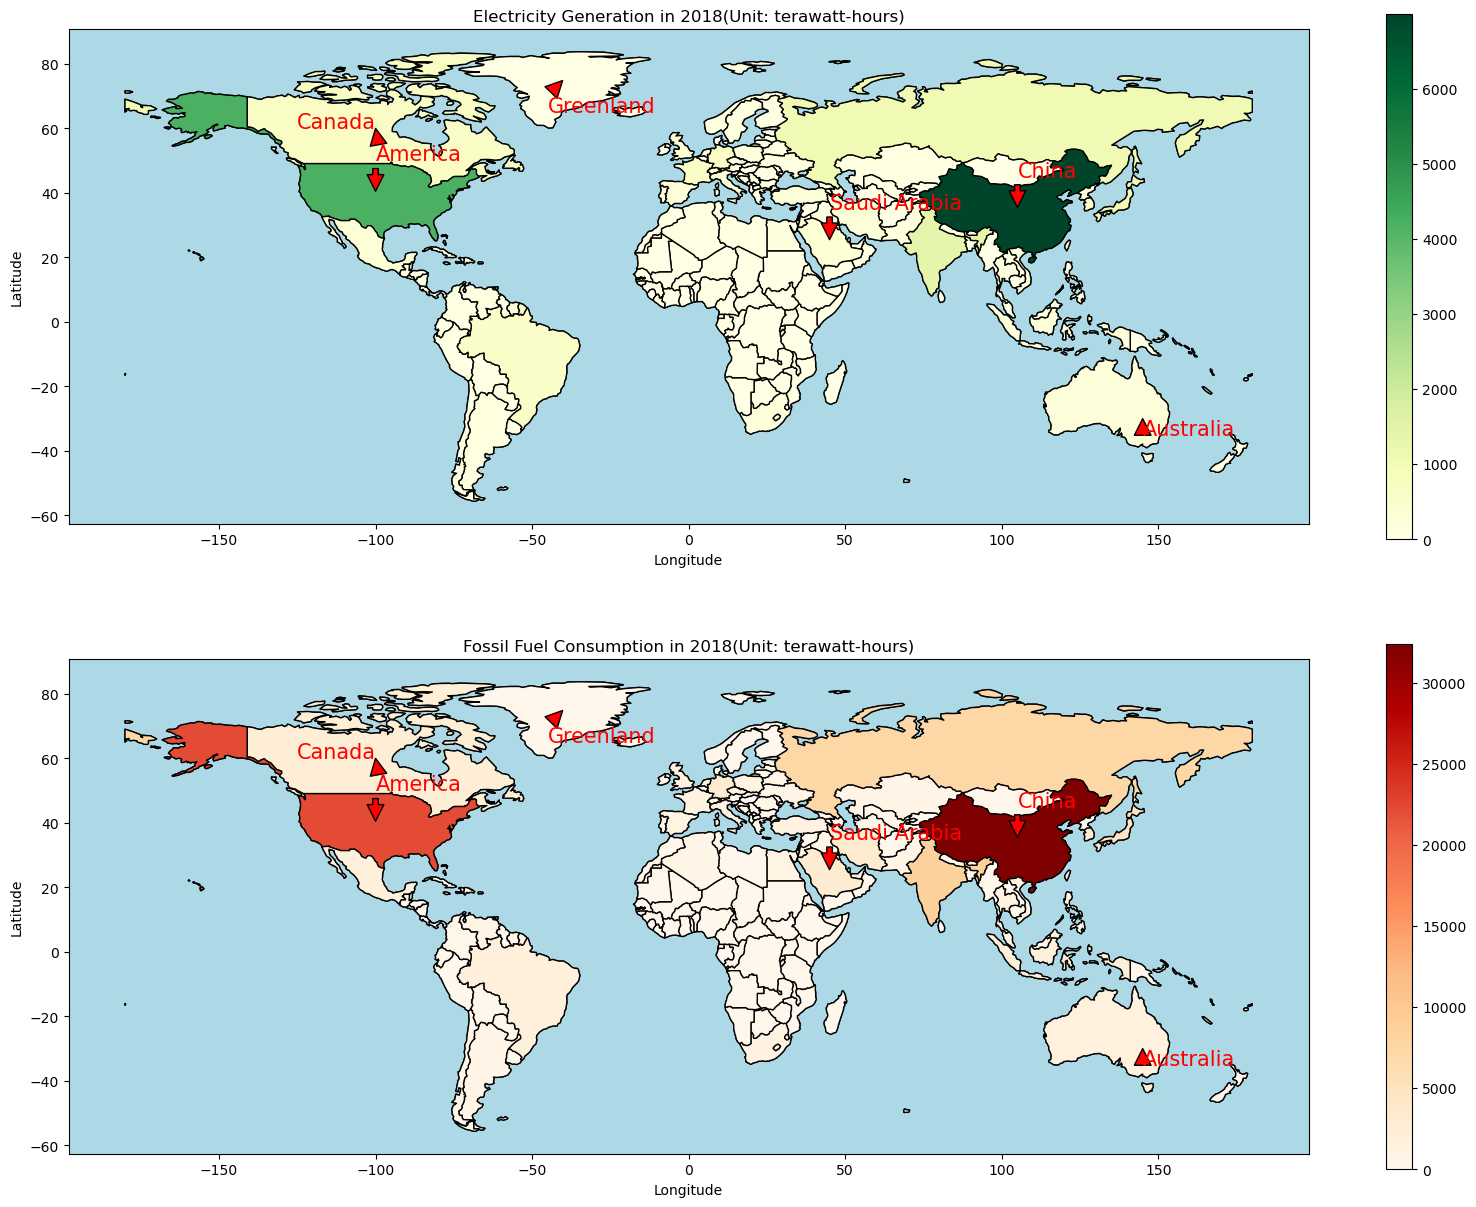

In [79]:
merged = world.merge(energy_consumption2018[['iso_code', 'electricity_generation', 'fossil_fuel_consumption']], 
                     left_on='iso_a3', right_on='iso_code', how='left').fillna(0)

fig, axs = plt.subplots(2, 1, figsize=(20,15))

for i in range(2):
    axs[i].set_facecolor('lightblue')
    axs[i].set_xlabel('Longitude')
    axs[i].set_ylabel('Latitude')
    axs[i].set_aspect('equal')
    
world.plot(ax=axs[0], facecolor='none')
world.plot(ax=axs[1], facecolor='none')

    
merged.plot(column='electricity_generation', cmap='YlGn', legend=True, ax=axs[0], edgecolor='black')
axs[0].set_title('Electricity Generation in 2018(Unit: terawatt-hours)')

merged.plot(column='fossil_fuel_consumption', cmap='OrRd', legend=True, ax=axs[1], edgecolor='black')
axs[1].set_title('Fossil Fuel Consumption in 2018(Unit: terawatt-hours)')

for i in range(2):
    axs[i].annotate('China', xy=(105, 35), xytext=(105, 45), fontsize=15,
                arrowprops=dict(facecolor='red', shrink=0.05), color='Red')
    axs[i].annotate('Australia', xy=(145, -30), xytext=(145, -35), fontsize=15,
                arrowprops=dict(facecolor='red', shrink=0.05), color='Red')
    axs[i].annotate('Saudi Arabia', xy=(45, 25), xytext=(45, 35), fontsize=15,
                arrowprops=dict(facecolor='red', shrink=0.05), color='Red')
    axs[i].annotate('Greenland', xy=(-40, 75), xytext=(-45, 65), fontsize=15,
                arrowprops=dict(facecolor='red', shrink=0.05), color='Red')
    axs[i].annotate('America', xy=(-100, 40), xytext=(-100, 50), fontsize=15,
                arrowprops=dict(facecolor='red', shrink=0.05), color='Red')
    axs[i].annotate('Canada', xy=(-100, 60), xytext=(-125, 60), fontsize=15,
                arrowprops=dict(facecolor='red', shrink=0.05), color='Red')


plt.show()

### Electricity Generation and Fossil Fuel Consumption per capita in 2018 around the world
The two maps generated by the code below depict the per capita electricity generation and fossil fuel consumption of countries worldwide in 2018. The maps provide valuable insights into the relationship between the two factors and their implications on global warming.

One observation from the maps is that countries with higher electricity generation per capita tend to have higher fossil fuel consumption per capita. This finding highlights the high correlation between electricity generation and fossil fuel consumption, which is not surprising given that most countries rely heavily on fossil fuels to generate electricity.

Another interesting finding is that China, despite being the highest electricity generator, is not the highest fossil fuel consumer per capita. Other countries such as Australia, Canada, USA, and Saudi Arabia have higher fossil fuel consumption per capita than China.

Moreover, the fossil fuel consumption per capita map is highly consistent with the carbon emission per capita map, indicating that fossil fuel consumption is the main factor contributing to carbon emissions and global warming. The consistency between the two maps also suggests that reducing fossil fuel consumption is an effective way to combat climate change.

In addition, the fossil fuel consumption per capita map correlates highly with the hottest month temperature change map. This correlation provides evidence that fossil fuel consumption is the primary factor driving global warming, as the burning of fossil fuels releases greenhouse gases into the atmosphere, leading to rising temperatures and other climate-related changes.

Overall, the maps generated by the code below provide valuable insights into the relationship between electricity generation, fossil fuel consumption, and global warming. The findings highlight the need to reduce our reliance on fossil fuels and transition to cleaner sources of energy to combat climate change.

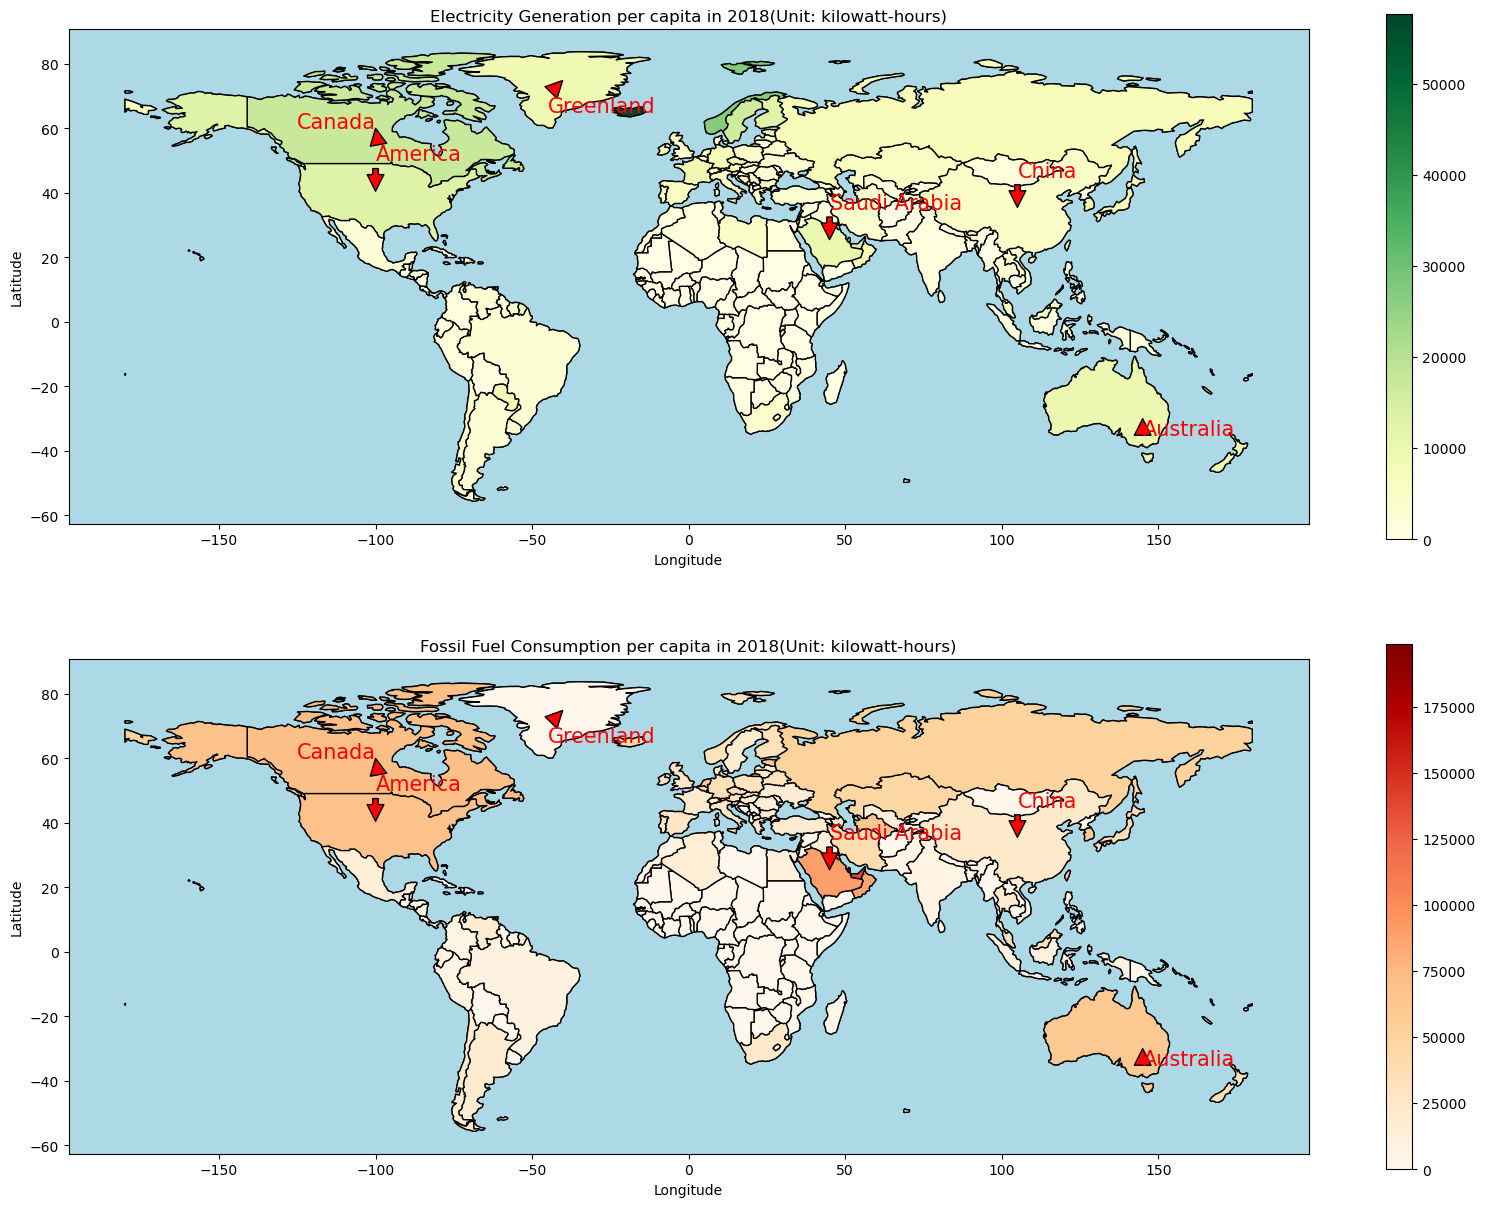

In [80]:
merged = world.merge(energy_consumption2018[['iso_code', 'per_capita_electricity', 'fossil_energy_per_capita']], 
                     left_on='iso_a3', right_on='iso_code', how='left').fillna(0)

fig, axs = plt.subplots(2, 1, figsize=(20,15))
for i in range(2):
    axs[i].set_facecolor('lightblue')
    axs[i].set_xlabel('Longitude')
    axs[i].set_ylabel('Latitude')
    axs[i].set_aspect('equal')
    
world.plot(ax=axs[0], facecolor='none')
world.plot(ax=axs[1], facecolor='none')

merged.plot(column='per_capita_electricity', cmap='YlGn', legend=True, ax=axs[0], edgecolor='black')
axs[0].set_title('Electricity Generation per capita in 2018(Unit: kilowatt-hours)')

merged.plot(column='fossil_energy_per_capita', cmap='OrRd', legend=True, ax=axs[1], edgecolor='black')
axs[1].set_title('Fossil Fuel Consumption per capita in 2018(Unit: kilowatt-hours)')

for i in range(2):
    axs[i].annotate('China', xy=(105, 35), xytext=(105, 45), fontsize=15,
                arrowprops=dict(facecolor='red', shrink=0.05), color='Red')
    axs[i].annotate('Australia', xy=(145, -30), xytext=(145, -35), fontsize=15,
                arrowprops=dict(facecolor='red', shrink=0.05), color='Red')
    axs[i].annotate('Saudi Arabia', xy=(45, 25), xytext=(45, 35), fontsize=15,
                arrowprops=dict(facecolor='red', shrink=0.05), color='Red')
    axs[i].annotate('Greenland', xy=(-40, 75), xytext=(-45, 65), fontsize=15,
                arrowprops=dict(facecolor='red', shrink=0.05), color='Red')
    axs[i].annotate('America', xy=(-100, 40), xytext=(-100, 50), fontsize=15,
                arrowprops=dict(facecolor='red', shrink=0.05), color='Red')
    axs[i].annotate('Canada', xy=(-100, 60), xytext=(-125, 60), fontsize=15,
                arrowprops=dict(facecolor='red', shrink=0.05), color='Red')

plt.show()

# 3. Project Three

## 3.1 Potential Data for Scrape
Global warming trends are a matter of concern worldwide. In the first and second projects, we examined temperature changes across the globe, including specific continents, countries, and six cities. Additionally, we utilized map visualization to identify global warming trends. The second project also included data on carbon emission, fossil fuel consumption, and electricity generation, which helped us establish relationships between these factors and global warming trends. For our third project, we already have substantial evidence that global warming is a real phenomenon affecting every country. Therefore, we decided to shift our focus from climate to the actual impact and consequences of global warming. 

We expanded our scope beyond carbon dioxide and scraped data from the World Bank (http://wdi.worldbank.org/table). We obtained tables on greenhouse emissions, which included carbon dioxide, methane, and nitrous oxide. We also scraped data on forest area changes and threatened species in each country to better understand the impact of global warming on different regions. By merging these datasets with our map visualization, we can see the distribution of greenhouse gas emissions and forest changes by country. We also grouped threatened species by continent and examined their patterns with temperature trends.  we aimed to identify relationships between these factors and global warming trends. Through our analysis, we sought to deepen our understanding of the environmental impact of global warming and to promote awareness of the issue's urgency. The World Bank allowed us to web scrape their data through their API. However, we encountered errors when attempting to download data directly, which is why we chose to use HTML web scraping.

## 3.2 Potential Challenges
Web scraping can be a challenging task, especially when looking for new datasets. In our project, finding a new and relevant dataset was a significant challenge, as the link provided us with carbon emission per capita data that we had already used in the second project. Additionally, when attempting to use API scraping on some websites, we encountered difficulties as it required a token that was sent to our email, and it was hard to use the correct command to find the dataset we wanted. Moreover, some datasets were only available for purchase, making it impossible to scrape them. Furthermore, when attempting to scrape new websites, some codes for the table in the HTML file were not similar to what we did in the exercise. For instance, instead of using "<tr>" to indicate the rows, some websites had different formats. Lastly, even when we found the proper table in the World Bank, the columns' names were dynamic and moved independently of the table. Additionally, some tables had 13 columns and it is multi-indices, which meant that we had to create column names manually for the dataframe.

## 3.3 Scraping Data from a Website
In this section, we start by web scraping two tables from the World Bank. The first table records greenhouse gas emissions in thousand metric tons of carbon dioxide equivalent for each country in 2009, 2014, and 2019. This data is critical as it will help us analyze the greenhouse gas emission trends across different regions and timeframes. We will also be able to determine the countries with the highest greenhouse gas emissions and identify areas that require more attention.

The second table records the forest area for each country in 1990, 2020, and the number of threatened species in 2018. This data is essential to help us understand how global warming is affecting the world's forests and wildlife. With this information, we can identify countries where deforestation and habitat destruction are occurring, contributing to the loss of biodiversity. Additionally, we can examine how changes in forest area and threatened species relate to global warming trends, identifying areas that require more protection and conservation efforts.

First import the library needed

In [81]:
import requests
import json
from bs4 import BeautifulSoup
import country_converter as coco

### GreenHouse Emission
Send a request to the world bank and get the content from http://wdi.worldbank.org/table/3.9

In [82]:
url = "http://wdi.worldbank.org/table/3.9"

response = requests.get(url)

Use the BeautifulSoup library to parse the HTML content. soup holds a structured representation of the HTML content.

In [83]:
soup = BeautifulSoup(response.content, 'html.parser')

Uses the BeautifulSoup to find all table elements with a class of indicators-table in the soup, and assigns the second table in the resulting list to the variable table.

In [84]:
table = soup.find_all('table', class_='indicators-table')[1]

Uses the find_all() method of the table object to retrieve all the tr (table row) elements within the table. 

In [85]:
rows = table.find_all('tr')

Creates an empty pandas DataFrame called green_house with columns for country names and various greenhouse gas emissions data. Then uses a loop to iterate over rows of data, extract cell values, and append them to the DataFrame as a new row for each iteration. Note we append None instead of '..' to indicate a empty data.

In [89]:
green_house = pd.DataFrame(columns=['Country',  'GreenHouse2014', 'GreenHouse2019', 
                                    'CO2014', 'CO2019', 
                                    'Methane2014', 'Methane2019', 
                                    'Nitrous2014', 'Nitrous2019'
                                   ])
ix = 0

for row in rows:
    cells = row.find_all('td')
    lst = []
    for cell in cells:
        if cell.get_text() == '..':
            lst.append(None)
        else:   
            lst.append(cell.get_text().replace(',', ''))
    green_house.loc[ix] = lst # Store it in the dataframe as a row
    ix += 1

Finally, we get a nice dataframe. The dataframe contains information on greenhouse gas emissions for different countries over the years 2009, 2014, and 2019. The columns represent the total greenhouse gas emissions, carbon monoxide emissions, methane emissions, and nitrous oxide emissions for each of these years. The Country column contains the names of the countries for which the emissions data is provided.

In [90]:
green_house.head(3)

Country GreenHouse2014 GreenHouse2019    CO2014    CO2019 Methane2014  \
0  Afghanistan        26760.0        28640.0    4880.0    6080.0       16300   
1      Albania         9360.0         9010.0    4820.0    4830.0        3090   
2      Algeria       253510.0       282010.0  147740.0  171250.0       89290   

  Methane2019 Nitrous2014 Nitrous2019  
0       16370        5090        5010  
1        2850        1140        1100  
2       92340       11700       12610

### Deforestation and biodiversity
We did similar thing to what we just did.

Send a request to the world bank and get the content from http://wdi.worldbank.org/table/3.4

In [92]:
url = "http://wdi.worldbank.org/table/3.4"

response = requests.get(url)

Use the BeautifulSoup library to parse the HTML content. soup holds a structured representation of the HTML content.

In [93]:
soup = BeautifulSoup(response.content, 'html.parser')

Uses the BeautifulSoup to find all table elements with a class of indicators-table in the soup, and assigns the second table in the resulting list to the variable table.

In [94]:
table = soup.find_all('table', class_='indicators-table')[1]

Uses the find_all() method of the table object to retrieve all the tr (table row) elements within the table.

In [95]:
rows = table.find_all('tr')

Creates an empty pandas DataFrame called forest_bio with columns for Country, Forest1990, Forest2020, Mammal2018, Bird2018, Fish2018, HigherPlants2018, ProtectLand%2021, and ProtectMarine%2021, and then iterates through rows and extracts data from each cell and append them to the DataFrame as a new row for each iteration. Note we append None instead of '..' to indicate a empty data.

In [97]:
forest_bio = pd.DataFrame(columns=['Country', 'Forest1990', 'Forest2020',
                                   'Mammal2018', 'Bird2018',
                                   'HigherPlants2018', 'ProtectLand%2021',
                                   'ProtectMarine%2021'
                                  ])
ix = 0

for row in rows:
    cells = row.find_all('td')
    lst = []
    for cell in cells:
        if cell.get_text() == '..':
            lst.append(None)
        else:   
            lst.append(cell.get_text().replace(',', ''))
    forest_bio.loc[ix] = lst # Store it in the dataframe as a row
    ix += 1

Finally, we get a nice dataframe. This dataframe contains information about various countries and their forest cover in 1990 and 2020, mammal species, bird species, fish species, and higher plants species in the year 2018, as well as the percentage of protected land and marine areas in 2021.

In [98]:
forest_bio.head(3)

Country Forest1990 Forest2020 Mammal2018 Bird2018 HigherPlants2018  \
0  Afghanistan         12         12         11       16             None   
1      Albania          8          8          3        8             None   
2      Algeria         17         19         14       15             None   

  ProtectLand%2021 ProtectMarine%2021  
0             None               None  
1             None                2.7  
2             None                0.1

## 3.4 Merging the Scraped Dataset

In this section, we will combine two tables, green_house and forest_bio, to create a merged dataframe called forest_greenhouse. Both tables have the same country column, and the merging process will allow us to combine the greenhouse gas emission data with the forest area and threatened species data. Next, we will add an additional column to the merged dataframe that indicates the iso code for each country. After that, we will merge the new forest_greenhouse dataframe with our old dataframe, world, which contains geography and map data in the iso code column. The result will be a new dataframe with geometry information, greenhouse emission, forest area, and threatened species data for each country.

In [99]:
forest_greenhouse = pd.merge(green_house, forest_bio, left_on='Country',
                             right_on='Country', how='outer')

In [100]:
forest_greenhouse['iso_code'] = ''
iso_codes = coco.convert(names=forest_greenhouse['Country'].tolist(), to='ISO3')
forest_greenhouse['iso_code'] = iso_codes

Channel Islands not found in regex
World not found in regex
East Asia & Pacific not found in regex
Europe & Central Asia not found in regex
Latin America & Caribbean not found in regex
Middle East & North Africa not found in regex
North America not found in regex
South Asia not found in regex
Sub-Saharan Africa not found in regex
Low income not found in regex
Lower middle income not found in regex
Upper middle income not found in regex
High income not found in regex


In [101]:
geo_forest_greenhouse = world.merge(forest_greenhouse, left_on='iso_a3',
                                    right_on='iso_code', how='outer')

In [103]:
cols_to_convert = ['GreenHouse2014', 
                   'GreenHouse2019', 
                   'CO2014', 'CO2019', 
                   'Methane2014', 'Methane2019', 
                    'Nitrous2014', 
                   'Nitrous2019', 'Forest1990', 
                   'Forest2020', 'Mammal2018', 
                   'Bird2018', 
                   'HigherPlants2018', 'ProtectLand%2021',
                   'ProtectMarine%2021'
                  ]

geo_forest_greenhouse[cols_to_convert] = geo_forest_greenhouse[cols_to_convert].astype(float)

In [104]:
geo_forest_greenhouse = gpd.GeoDataFrame(geo_forest_greenhouse)

After merging the forest_greenhouse and the world dataframes, we obtained a new dataframe called geo_forest_greenhouse. The world dataframe originally had 176 rows, which represented the geography data of all countries. However, after merging with the forest_greenhouse dataframe, the new dataframe had 233 rows, which is more. This is because we chose an outer merge, which includes all the rows from both dataframes, even if they didn't match. Some of the additional rows in the merged dataframe included continent information and other areas that didn't merge successfully.

In [105]:
len(world)

176

In [106]:
len(geo_forest_greenhouse)

233

## 3.5 Visualizing the Scraped Dataset

In this section, we will create visualizations for the merged data that includes greenhouse gas emissions, forest area, and threatened species data for each country. Using the GeoPandas library, we will create a world map with choropleth visualization to display the greenhouse gas emissions and forest area data. We will also create scatter plots to explore the relationship between temperature and greenhouse gas emissions, forest area, and threatened species. These visualizations will help us to better understand the distribution and patterns of greenhouse gas emissions, forest area, and threatened species by country, and how they relate to global warming trends.

In [107]:
from matplotlib.colors import LinearSegmentedColormap

In [108]:
def annotate_country(x):
    x.annotate('China', xy=(105, 35), xytext=(105, 45), fontsize=15,
                arrowprops=dict(facecolor='red', shrink=0.05), color='Red')
    x.annotate('Australia', xy=(145, -30), xytext=(145, -35), fontsize=15,
                arrowprops=dict(facecolor='red', shrink=0.05), color='Red')
    x.annotate('Saudi Arabia', xy=(45, 25), xytext=(45, 35), fontsize=15,
                arrowprops=dict(facecolor='red', shrink=0.05), color='Red')
    x.annotate('Greenland', xy=(-40, 75), xytext=(-45, 65), fontsize=15,
                arrowprops=dict(facecolor='red', shrink=0.05), color='Red')
    x.annotate('America', xy=(-100, 40), xytext=(-100, 50), fontsize=15,
                arrowprops=dict(facecolor='red', shrink=0.05), color='Red')
    x.annotate('Canada', xy=(-100, 60), xytext=(-125, 60), fontsize=15,
                arrowprops=dict(facecolor='red', shrink=0.05), color='Red')

In [109]:
graph_col = ['GreenHouse2019', 'CO2019', 'Methane2019', 'Nitrous2019']
Ln_graph_col = []
for item in graph_col:
    Ln_graph_col.append('Ln' + item)

In [110]:
geo_forest_greenhouse[Ln_graph_col] = geo_forest_greenhouse[graph_col].apply(np.log)

In [111]:
geo_forest_greenhouse = geo_forest_greenhouse[geo_forest_greenhouse!=float('-inf')]

### Global Greenhouse Gas Emissions by Country in 2019 - A Logarithmic View

We visualize four maps that correspond to the total greenhouse gas emissions, carbon dioxide emissions, methane emissions, and nitrous oxide emissions by country in 2019. The unit used is the natural logarithm of the thousand metric tons of carbon dioxide equivalent, which means that the difference in color between two countries represents an exponential difference of maybe 100 or 1000 times. The four maps show a consistent pattern, with countries having high greenhouse gas emissions also having high carbon dioxide, methane, and nitrous oxide emissions. China and the USA are the countries with the highest level of greenhouse gas emissions, which is about 10^15 thousand metric tons of CO2 equivalent in 2021. When we compare the emissions by continent, Europe and Africa have the lowest levels of greenhouse gas and carbon dioxide emissions. Asia and North America have the highest levels of emissions for all categories. 

It is worth noting that in the second project, we found that North America, West Asia, and North Africa had the biggest increase in average temperature from 1900 to 2010. When we compared this data to our current findings on greenhouse gas emissions, we noticed a correlation between the two. Countries with higher greenhouse gas emissions tend to have higher average temperatures. This is consistent with the scientific understanding of global warming, which explains that greenhouse gases trap heat in the Earth's atmosphere, leading to a rise in temperatures.

Furthermore, we found that the relationship between emissions and temperature changes is not evenly distributed across the globe. For example, some countries with relatively low emissions, such as those in Africa, are experiencing significant temperature increases. This is likely due to a combination of factors, including regional weather patterns and the effects of global emissions in other parts of the world.

Overall, our analysis suggests that there is a strong relationship between greenhouse gas emissions and temperature changes. By examining this relationship on a global scale, we can identify patterns and trends that are important for understanding the impact of climate change on our planet.

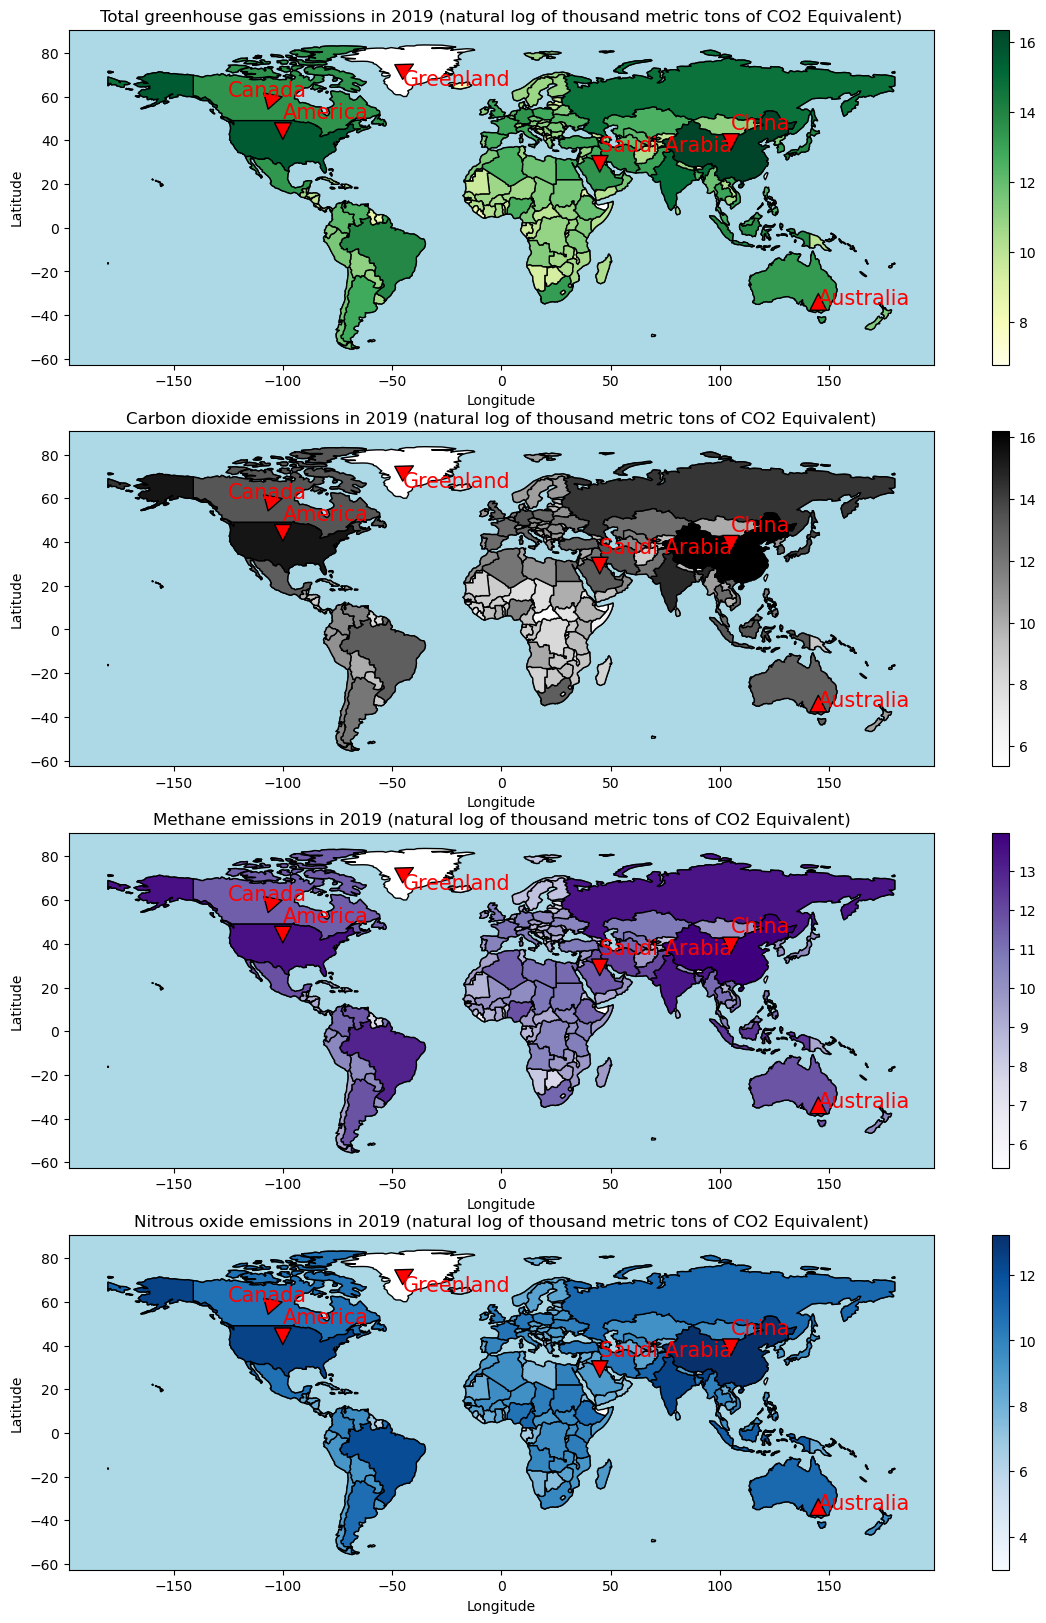

In [112]:
fig, axs = plt.subplots(4, 1, figsize=(15,20))
cmap_lst = ['YlGn', 'Greys', 'Purples', 'Blues']
title_lst = ['Total greenhouse gas emissions',
             'Carbon dioxide emissions',
             'Methane emissions',
             'Nitrous oxide emissions'
            ]
units = '(natural log of thousand metric tons of CO2 Equivalent)'

for i in range(4):
    world.plot(ax=axs[i], edgecolor='black', facecolor='white')
    geo_forest_greenhouse.dropna(subset=['geometry']).plot(column=Ln_graph_col[i], cmap=cmap_lst[i], 
                               legend=True, ax=axs[i], edgecolor='black'
                              )
    axs[i].set_facecolor('lightblue')
    axs[i].set_xlabel('Longitude')
    axs[i].set_ylabel('Latitude')
    axs[i].set_aspect('equal')
    axs[i].set_title(title_lst[i]+' in 2019 '+units)
    annotate_country(axs[i])

In [113]:
mask = geo_forest_greenhouse['continent'] == 'Seven seas (open ocean)'

In [115]:
df = geo_forest_greenhouse.copy().drop(geo_forest_greenhouse[mask].index)

grouped = df.groupby('continent')

gh_cols = [ 'GreenHouse2014', 'GreenHouse2019']
co_cols = ['CO2014', 'CO2019']
ch4_cols = ['Methane2014', 'Methane2019']
n2o_cols = ['Nitrous2014', 'Nitrous2019']

gh_data = grouped[gh_cols].mean()
co_data = grouped[co_cols].mean()
ch4_data = grouped[ch4_cols].mean()
n2o_data = grouped[n2o_cols].mean()

gh_data_T = gh_data.T
co_data_T = co_data.T
ch4_data_T = ch4_data.T
n2o_data_T = n2o_data.T

### Comparison of Greenhouse Gas Emissions by Continent and Year
The second graph consists of four bar graphs showing the trends of greenhouse gas emissions, carbon dioxide emissions, methane emissions, and nitrous oxide emissions by continents in 2009, 2014, and 2019. The bar graphs reinforce the patterns observed in the previous map, showing that North America and Asia are the largest contributors to greenhouse gas emissions, carbon dioxide emissions, methane emissions, and nitrous oxide emissions. South America also contributes a significant share of methane and nitrous oxide emissions. Other continents show a relatively steady trend in all four categories of emissions. However, Asia shows an increasing trend in all four categories of emissions from 2009 to 2019. These trends suggest that if measures are not taken to reduce emissions, the contribution of Asia to global warming may increase significantly in the future.

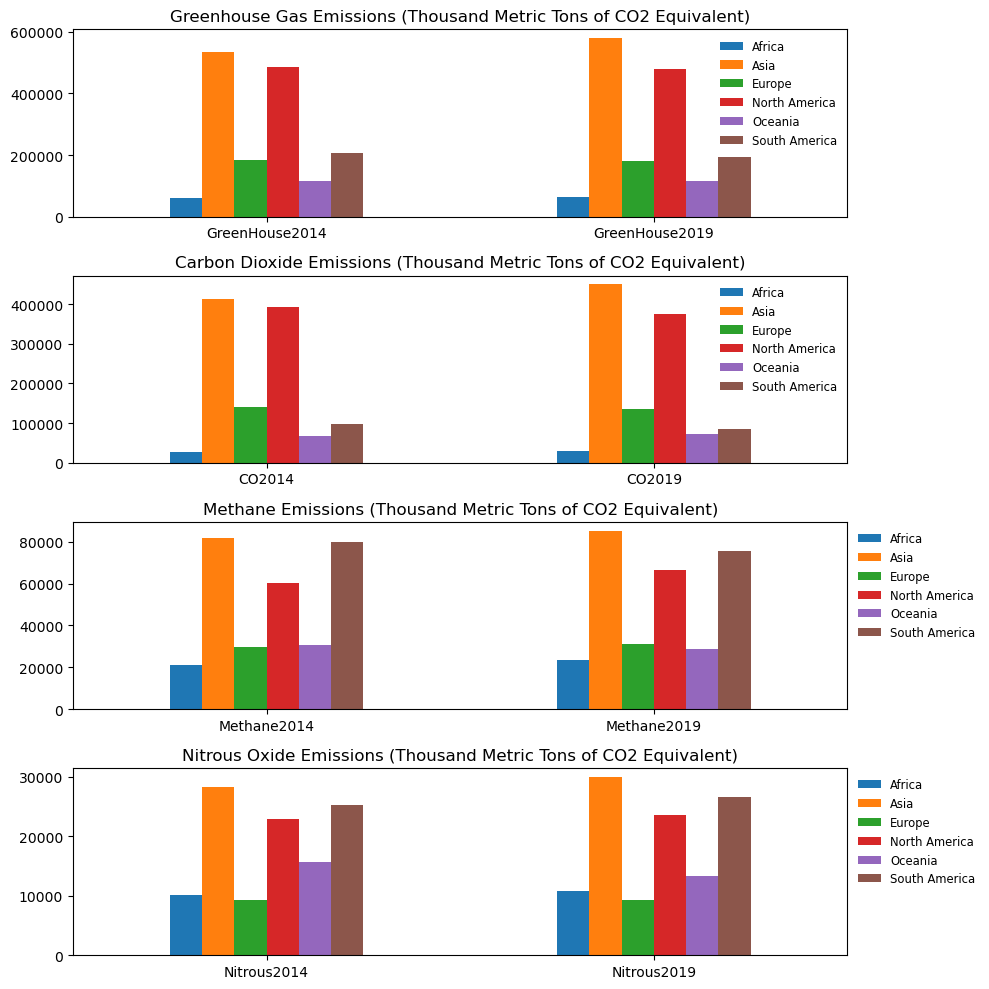

In [116]:
fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(10,10))

gh_data_T.plot(kind='bar', ax=axs[0], rot=0)
co_data_T.plot(kind='bar', ax=axs[1], rot=0)
ch4_data_T.plot(kind='bar', ax=axs[2], rot=0)
n2o_data_T.plot(kind='bar', ax=axs[3], rot=0)

axs[0].set_title('Greenhouse Gas Emissions (Thousand Metric Tons of CO2 Equivalent)')
axs[1].set_title('Carbon Dioxide Emissions (Thousand Metric Tons of CO2 Equivalent)')
axs[2].set_title('Methane Emissions (Thousand Metric Tons of CO2 Equivalent)')
axs[3].set_title('Nitrous Oxide Emissions (Thousand Metric Tons of CO2 Equivalent)')

axs[0].legend(bbox_to_anchor=(1.0, 1.0), fontsize='small', frameon=False)
axs[1].legend(bbox_to_anchor=(1.0, 1.0), fontsize='small', frameon=False)
axs[2].legend(bbox_to_anchor=(1.0, 1.0), fontsize='small', frameon=False)
axs[3].legend(bbox_to_anchor=(1.0, 1.0), fontsize='small', frameon=False)


plt.tight_layout()
plt.show()

In [117]:
geo_forest_greenhouse['forest_difference'] = geo_forest_greenhouse['Forest2020'] - geo_forest_greenhouse['Forest1990']

In [118]:
import matplotlib.colors as mcolors

### Changes in Forest Area by Country (1990-2020)
The third graph shows the changes in forest area for each country between 1990 and 2020. The graph indicates that China has significantly increased its forest area by 600,000 km², while Brazil has lost 800,000 km² of forest area. Other countries in Africa and South Asia have also seen decreases ranging from 200,000 to 400,000 km². On the other hand, China and North America are outliers, indicating that their forest area has increased over the years.

The graph does not show a strong relationship between global warming and forest area changes. However, it is important to note that deforestation is a major contributor to greenhouse gas emissions, particularly in tropical countries like Brazil. Therefore, efforts to combat global warming should also include initiatives to reduce deforestation rates and encourage reforestation in areas where forest cover has been lost.

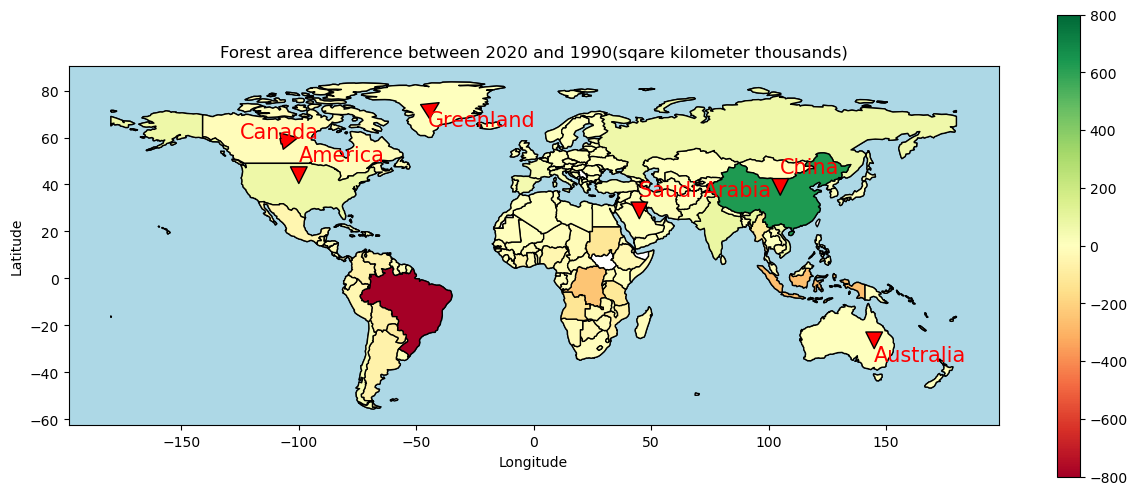

In [119]:
fig, axs = plt.subplots(1, 1, figsize=(15,6))
units = '(sqare kilometer thousands)'

world.plot(ax=axs, edgecolor='black', facecolor='white')
geo_forest_greenhouse.dropna(subset=['geometry']).plot(column='forest_difference',
                                                       cmap='RdYlGn', legend=True, 
                                                       ax=axs, edgecolor='black',
                                                       vmin=-800, vmax=800
                                                      )

axs.set_facecolor('lightblue')
axs.set_xlabel('Longitude')
axs.set_ylabel('Latitude')
axs.set_aspect('equal')
axs.set_title('Forest area difference between 2020 and 1990'+units)

annotate_country(axs)

### Threatened Species by Continent in 2018: Mammals, Birds, Fish, and Higher Plants
The fourth graph shows the number of threatened species categorized by mammals, birds, fish, and higher plants by continents in 2018. We can see that the number of threatened higher plants is the most significant, followed by fish, birds, and mammals. In Africa and Asia, the number of threatened higher plants is around 4000 to 5000, while it's 3500 in South America, 2500 in North America, and around 1000 in Oceania and Europe. The number of threatened fish is around 2000 in Africa and Asia. These results indicate a strong correlation between greenhouse gas emissions and the number of threatened higher plants and fishes. Moreover, the fact that Africa has the most significant temperature increase, as we saw in the second project, is consistent with having the highest number of threatened higher plants. The high number of threatened higher plants in South America is also consistent with the forest decrease result from the last graph. Biodiversity is crucial to the health and survival of ecosystems, and it is also essential for human well-being. Overall, the graph shows the importance of preserving biodiversity in different regions of the world and addressing the impact of human activity on threatened species. We find that global warming and climate change are among the biggest threats to biodiversity. Therefore, it is essential to take action to mitigate the impacts of global warming and climate change to protect biodiversity. This can include reducing greenhouse gas emissions, preserve the forest, and protect more wild area.

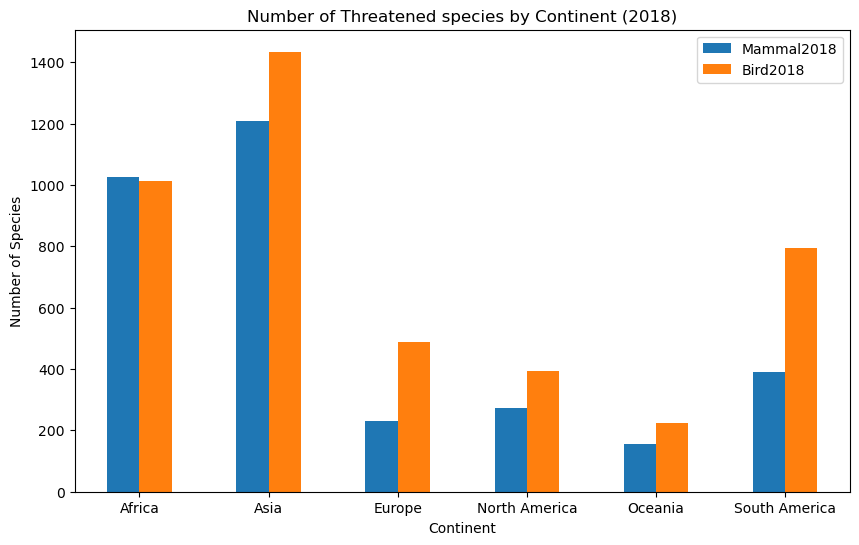

In [123]:
df = geo_forest_greenhouse[['continent', 'Mammal2018', 'Bird2018']].drop(geo_forest_greenhouse[mask].index)



grouped = df.groupby('continent').sum()
fig, axs = plt.subplots(1, 1, figsize=(10,6))

grouped.plot(kind='bar', ax=axs, rot=0)
plt.xlabel('Continent')
plt.ylabel('Number of Species')
plt.title('Number of Threatened species by Continent (2018)')
plt.show()

## 3.6 Adding a New Dateset

In this section, we will analyze a new dataset related to agriculture from kaggle (https://www.kaggle.com/datasets/unitednations/global-food-agriculture-statistics?resource=download), which is an important factor closely related to human beings. We will see how different areas or countries are affected by their crops' production and yield. Agriculture is a vital sector for many countries, providing food, fiber, and other resources necessary for human life. This new dataset includes information on the production of different crops in different countries over time, which can help us understand how agricultural practices and climate change affect food security and production.

We will start by exploring the dataset and cleaning the data, making sure that it is accurate and relevant to our analysis. We will then merge this dataset with our existing datasets on geography dataframe called world to see how different area is affected.We will also compare the agricultural practices and crop production of different continents to see how they differ and what factors contribute to these differences.By analyzing this new dataset, we hope to gain a better understanding of the impact of agriculture on climate change and vice versa.

In [124]:
crops = pd.read_csv(file_path+'fao_data_crops_data.csv')

In [125]:
Production = crops.loc[crops['element'] == 'Production Quantity']

In [126]:
Yield = crops.loc[crops['element'] == 'Yield']

In [127]:
Production_1962_2006 = Production[Production['year'].isin([1980, 2006])]
grouped = Production_1962_2006.groupby('country_or_area')['value']
diff = grouped.diff().dropna()
Production = Production.merge(diff, how='left', left_index=True, right_index=True)
Production = Production.rename(columns={'value_y': 'production difference'})

In [128]:
Production_2006 = Production[Production['year'] == 2006]

In [129]:
Production_2006_small = Production_2006.groupby('country_or_area').mean().reset_index()

In [130]:
Yield_1962_2006 = Yield[Yield['year'].isin([1980, 2006])]
grouped = Yield_1962_2006.groupby('country_or_area')['value']
diff = grouped.diff().dropna()
Yield = Yield.merge(diff, how='left', left_index=True, right_index=True)
Yield = Yield.rename(columns={'value_y': 'yield difference'})

In [131]:
Yield_2006 = Yield[Yield['year'] == 2006]

In [132]:
Yield_2006_small = Yield.groupby('country_or_area').mean().reset_index()

In [133]:
merged_agri = pd.merge(Production_2006_small, Yield_2006_small, 
                       left_on='country_or_area', right_on='country_or_area', 
                       how='outer')

In [134]:
merged_agri['iso_code'] = ''
iso_codes = coco.convert(names=merged_agri['country_or_area'].tolist(), to='ISO3')
merged_agri['iso_code'] = iso_codes

Africa + not found in regex
Americas + not found in regex
Asia + not found in regex
More then one regular expression match for Australia and New Zealand +
More then one regular expression match for Australia and New Zealand +
More then one regular expression match for Australia and New Zealand +
More then one regular expression match for Australia and New Zealand +
More then one regular expression match for Australia and New Zealand +
More then one regular expression match for Australia and New Zealand +
More then one regular expression match for Australia and New Zealand +
More then one regular expression match for Australia and New Zealand +
More then one regular expression match for Australia and New Zealand +
More then one regular expression match for Australia and New Zealand +
More then one regular expression match for Australia and New Zealand +
More then one regular expression match for Australia and New Zealand +
More then one regular expression match for Australia and New Zea

In [135]:
merged_agri['iso_code'] = merged_agri['iso_code'].astype(str)
merged_agri_map = world.merge(merged_agri, left_on='iso_a3', right_on='iso_code', how='left')

In [136]:
merged_agri_map = gpd.GeoDataFrame(merged_agri_map)

### Changes in Crops Production between 1980 and 2006 by Country
The map in this section displays the difference in crops production between 2006 and 1980 by country, with the unit of measurement being million tons. This dataset sheds light on how different countries and regions are affected by changes in agriculture over time.

The map shows that several continents such as Asia, North and South America have experienced a significant increase in their crops production in the past 30 years. Some countries in Australia and most of Africa also show an increase in production. However, other continents such as Europe, Africa, and Oceania didn't show that much increase in their production, and some countries in Europe even had a decrease in production over the same time period.

This dataset is important for understanding the dynamics of food production and the impact of global changes such as climate change on agriculture. The increase in production in some countries can be due to several factors such as the implementation of new agricultural technologies, increase in the use of fertilizers and pesticides, and better irrigation methods. On the other hand, the decrease in production in some countries can be attributed to factors such as climate change, land degradation, and soil erosion.

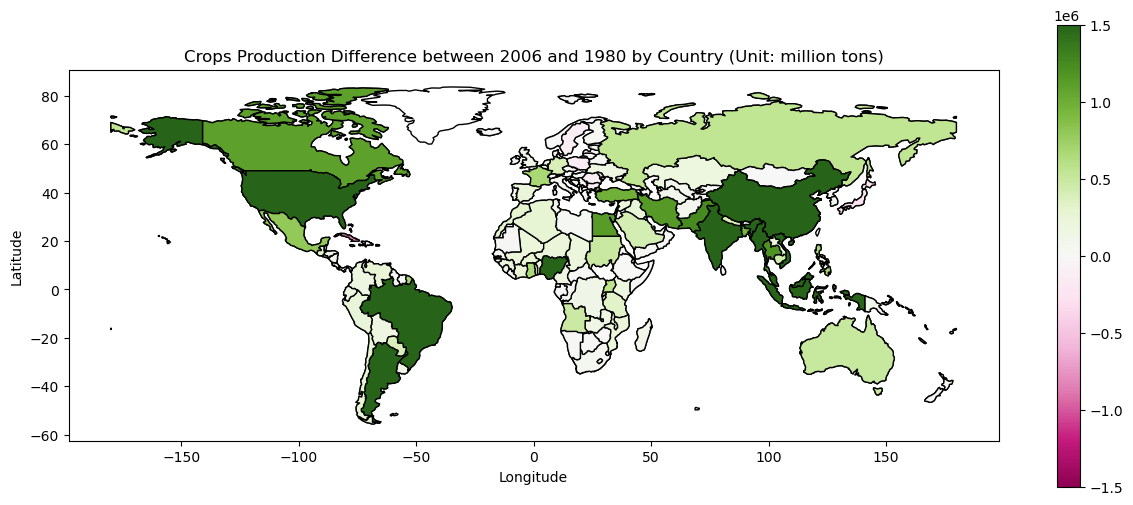

In [137]:
fig, axs = plt.subplots(1, 1, figsize=(15,6))
world.plot(ax=axs, edgecolor='black', facecolor='white')
merged_agri_map.dropna(subset=['geometry']).plot(column='production difference', cmap='PiYG', 
                     legend=True, ax=axs, edgecolor='black',
                     vmin=-1500000, vmax=1500000
                    )
# Customize the plot
plt.title('Crops Production Difference between 2006 and 1980 by Country (Unit: million tons)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

### Crops Yield Changes between 1980 and 2006 by Country: Increases and Decreases
This map shows the difference in crops yield between 2006 and 1980 by country, measured in hectograms per hectare. Crop yield is a measure of the efficiency of production, indicating the amount of crops produced per unit area. The first sub-map shows increases in yield, while the second sub-map shows decreases. While crop production has increased in most continents, not all areas have experienced an increase in crop yield. In Africa, while some countries have seen an increase in yield, others have experienced significant decreases in yield by 2000 to 3000 hectograms per hectare. Similarly, almost all countries in Europe have seen a decrease in yield by 1000 hectograms per hectare. Brazil in South America also experienced a decrease in yield by 1000 hectograms per hectare. These results indicate that while some areas have increased crop production, they have done so at the expense of lower yields, which may require more land to farm in order to maintain or increase production levels. This could explain why South America has experienced significant forest area decreases, as shown in the previous graph.

The decrease in crop yield in certain regions could also be related to the effects of global warming. Higher temperatures, changes in precipitation patterns, and extreme weather events can all negatively impact crop yields. This is especially true for regions that are already vulnerable due to poor soil quality, limited access to water resources, and other socio-economic factors.

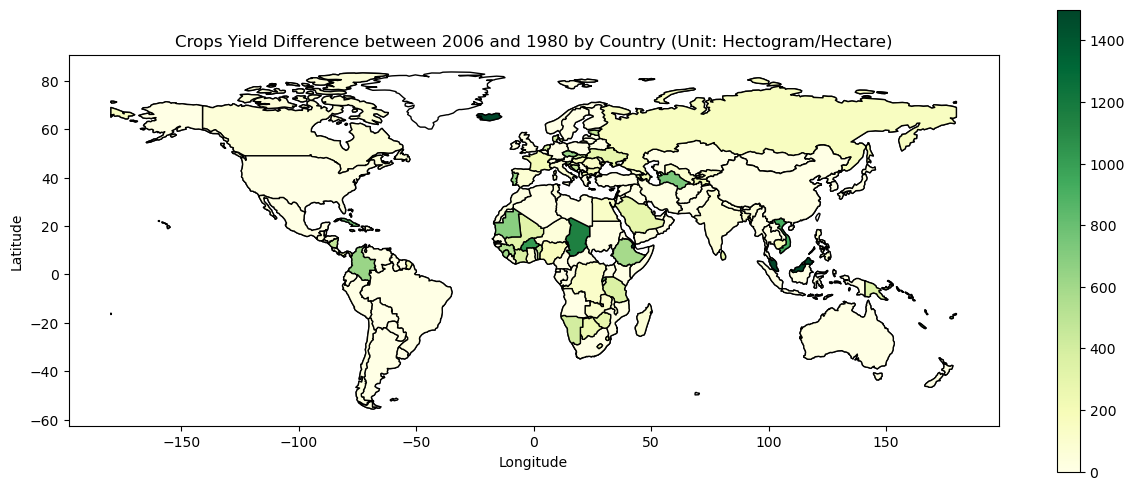

In [138]:
fig, axs = plt.subplots(1, 1, figsize=(15, 6))
world.plot(ax=axs, edgecolor='black', facecolor='white')
merged_agri_map.dropna(subset=['geometry']).plot(column='yield difference', cmap='YlGn', 
                     legend=True, ax=axs, edgecolor='black',
                     vmin=0, vmax=1500
                    )
# Customize the plot
plt.title('Crops Yield Difference between 2006 and 1980 by Country (Unit: Hectogram/Hectare)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

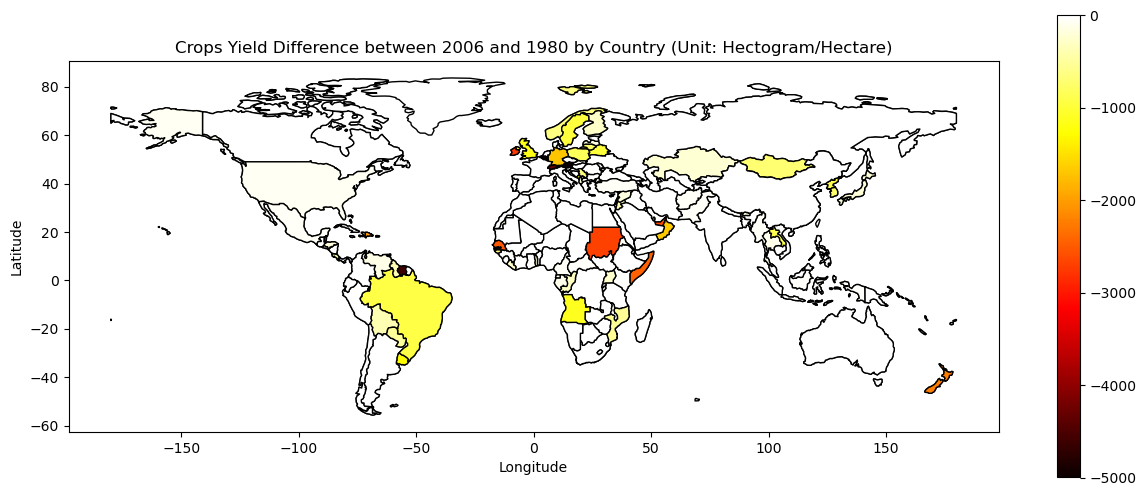

In [139]:
fig, axs = plt.subplots(1, 1, figsize=(15, 6))
world.plot(ax=axs, edgecolor='black', facecolor='white')
merged_agri_map.dropna(subset=['geometry']).plot(column='yield difference', cmap='hot', 
                     legend=True, ax=axs, edgecolor='black',
                     vmin=-5000, vmax=0
                    )
# Customize the plot
plt.title('Crops Yield Difference between 2006 and 1980 by Country (Unit: Hectogram/Hectare)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [140]:
# assume your dataframe is named 'production'
continent_names = ['Asia +', 'Europe +', 'Africa +', 'Oceania +', 'Northern America +', 'South America +']
Production_continent = Production[Production['country_or_area'].isin(continent_names)]

In [141]:
pivot_prod = Production_continent.pivot_table(values='value_x', index='year', columns='country_or_area')

### Global Trends in Crops Production over 60 Years by Continent
This line graph displays the changes in crop production in different continents over the past 60 years, measured in 10^7 tons. We can observe that Asia, North America, South America, and Africa have seen significant increases in crop production, while Oceania has remained relatively stable and Europe has experienced a decline in production. The growth in Asia can be attributed to population growth and increased demand for food. Interestingly, North America's production has become more fluctuated after the 1980s, despite an overall increase. This may be due to the effects of global warming, which we have previously examined through the average and hottest month temperature changes. The graph highlights the importance of agriculture in meeting the world's growing demand for food, as well as the need to address the challenges of global warming and sustainability in the agriculture industry.

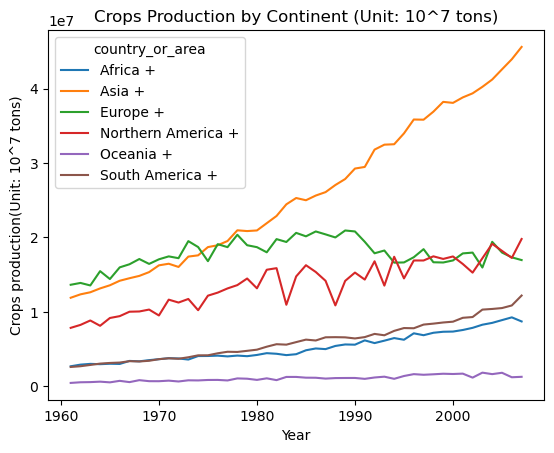

In [142]:
pivot_prod.plot()
plt.title('Crops Production by Continent (Unit: 10^7 tons)')
plt.xlabel('Year')
plt.ylabel('Crops production(Unit: 10^7 tons)')
plt.show()

In [143]:
Yield_continent = Yield[Yield['country_or_area'].isin(continent_names)]

In [144]:
pivot_Yield = Yield_continent.pivot_table(values='value_x', index='year', columns='country_or_area')

### Global Trends in Crops Yield over 60 Years by Continent
It displays the yield of crops in different continents over a period of 60 years, with the unit being hectogram per hectare. The graph reveals that the yield of crops is not as optimistic as the production of crops, with Europe being the most fluctuating continent.

Asia shows a rapid increase in crop yield during the 1980s and 1990s, followed by a sharp drop in the 1990s. When compared with the previous project that displays the average temperature by continents, it can be observed that Asia experienced fast growth in average temperature during that period also.

Continents like Oceania, South America, and Europe also experienced a decrease in crop yield during the 1980s and 1990s. However, all continents except Europe became steady after 1995. The trend for all continents before 1990 shows that the yield was very unsteady, which is probably due to extreme weather. Therefore, it can be inferred that global warming has a significant impact on agriculture, leading to fluctuating crop yields in different continents.

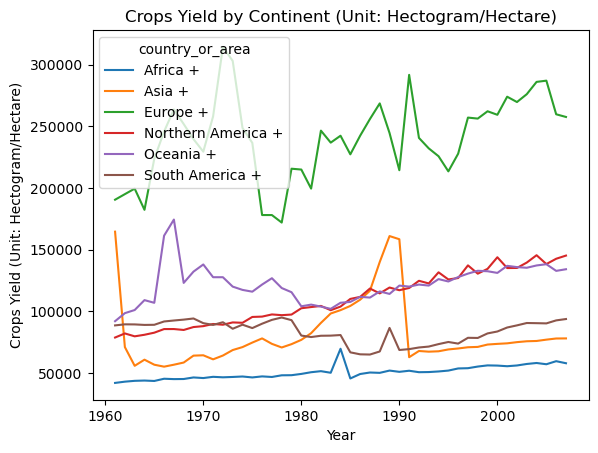

In [145]:
pivot_Yield.plot()
plt.title('Crops Yield by Continent (Unit: Hectogram/Hectare)')
plt.xlabel('Year')
plt.ylabel('Crops Yield (Unit: Hectogram/Hectare)')
plt.show()

## 3.7 Conclusion
In conclusion, the analysis of the temperature dataset provides compelling evidence that global warming is a real phenomenon. The increase in average and maximum temperatures, coupled with a decrease in temperature difference, indicates a shift towards a more stable climate. While the standard deviation of temperature remains relatively stable, the observed increase in frequency of high temperatures suggests a trend towards a warmer climate across the globe.Furthermore, the analysis of average and hottest month temperatures across various continents reveals a clear and consistent upward trend. From North America to South America, Asia, Africa, Oceania, and Europe, all continents have experienced a steady increase in temperatures over the past 1.5 centuries. This trend is particularly evident after 1960, with Asia and Europe experiencing a significant increase in temperature.

The Analysis of the maps generated from the energy consumption data for 2018 has revealed some interesting findings. The two maps, per capita electricity generation and per capita fossil fuel consumption, are highly correlated, indicating that countries with high electricity generation also tend to have high fossil fuel consumption. The evidence strongly suggests that fossil fuel consumption is the primary factor contributing to global warming, and its effects are not limited to certain areas but are occurring globally. The consistency of the per capita fossil fuel consumption map with the per capita carbon emission and temperature change maps further supports this conclusion.

Based on the analysis of various datasets related to climate change, greenhouse gas emissions are a key driver of climate change and have increased rapidly over the past few decades, primarily due to human activities such as burning of fossil fuels and deforestation.One of the major consequences of global warming is the loss of forest area, which has been evident in all continents, but especially in South America and Africa. This has resulted in the displacement of many species and contributed to the extinction of many threatened species. The loss of biodiversity is a significant concern and can have serious implications for the sustainability of our planet.

Furthermore, agriculture, which is closely related to human beings, is also being affected by climate change. While the production of crops has increased in all continents, the yield has not always followed the same trend. All continents has unsteady trend with yield during 1960 and 1995, likely due to the warmer temperatures.

In conclusion, it is evident that climate change is affecting our planet in many ways, and it is essential to take immediate action to mitigate the negative impacts. Reducing greenhouse gas emissions, preserving forest area, and promoting sustainable agriculture practices are just a few of the actions that can be taken to combat climate change and preserve the future of our planet.

## 4. Citation
Berkeley Earth. (n.d.). Climate Change: Earth Surface Temperature Data [Dataset]. Kaggle. Retrieved from https://www.kaggle.com/datasets/berkeleyearth/climate-change-earth-surface-temperature-data

CO2 emissions (metric tons per capita). Data. (n.d.). Retrieved March 3, 2023, from https://data.worldbank.org/indicator/EN.ATM.CO2E.PC 

World Energy Consumption. Kaggle. (n.d.). Retrieved March 3, 2023, from https://www.kaggle.com/datasets/pralabhpoudel/world-energy-consumption 

World development indicators: The World Bank. World Development Indicators | The World Bank. (n.d.). Retrieved March 24, 2023, from http://wdi.worldbank.org/table/3.9 

World development indicators: The World Bank. World Development Indicators | The World Bank. (n.d.). Retrieved March 24, 2023, from http://wdi.worldbank.org/table/3.4 

Nations, U. (2017, November 16). Global Food &amp; Agriculture Statistics. Kaggle. Retrieved March 24, 2023, from https://www.kaggle.com/datasets/unitednations/global-food-agriculture-statistics?resource=download 